# Lumpy Skin Disease Prediction Dataset

This dataset includes various geographical, meteorological, and environmental variables that may influence the occurrence of lumpy skin disease. Below is a description of each feature:

- **Longitude:** The longitudinal coordinate of the location, indicating its position east or west on the globe.

- **Latitude:** The latitudinal coordinate of the location, indicating its position north or south on the globe.

- **region:** The geographical region to which the data point belongs, typically grouping areas by similar climate or administrative boundaries.

- **country:** The country where the data point was collected.

- **reportingDate:** The date on which the data was reported, providing temporal context.

- **Monthly Cloud Cover:** The average monthly cloud cover percentage, indicating the proportion of sky covered by clouds over the month.

- **Diurnal Temperature Range:** The difference between daily maximum and minimum temperatures, which reflects temperature variability within a day.

- **Frost Day Frequency:** The number of days in a month with temperatures at or below freezing, indicating frost risk in the area.

- **Potential EvapoTranspiration:** The amount of water (in mm) that would evaporate and transpire if water was unlimited, representing the potential drying power of the climate.

- **Precipitation:** The total amount of rainfall (in mm) over the month, indicating wetness or dryness of the area.

- **Minimum Temperature:** The average monthly minimum temperature recorded, which affects cold stress on livestock and vegetation.

- **Mean Temperature:** The average monthly temperature, a measure of the overall thermal conditions of the area.

- **Maximum Temperature:** The average monthly maximum temperature recorded, reflecting the peak heat levels in the area.

- **Vapour Pressure:** The pressure exerted by water vapor in the atmosphere, which influences humidity levels.

- **Wet Day Frequency:** The number of days in a month with measurable precipitation, indicating how frequently the area receives rain.

- **elevation:** The altitude of the location in meters, which can influence temperature and precipitation patterns.

- **dominant_land_cover:** The main type of land cover (e.g., forest, grassland, urban) that characterizes the region, potentially influencing disease spread.

- **X5_Ct_2010_Da:** A specific land cover or environmental factor coded in the dataset, potentially representing cultivated or crop land cover (exact description may require additional domain-specific knowledge).

- **X5_Bf_2010_Da:** Another specific environmental or land cover feature coded in the dataset, possibly denoting a particular biome or forest cover type.

- **lumpy:** The target variable indicating the presence or absence of lumpy skin disease in the area, where typically `1` means disease is present, and `0` means absent.


# Import Libraries

In [90]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px
import joblib
import os

In [91]:
import warnings
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning

# Ignore specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [92]:
# Current working directory
current_dir = os.getcwd()

# Define BASE_DIR
BASE_DIR = os.path.abspath(os.path.join(current_dir, '..'))

BASE_DIR

'd:\\AI Projects\\Lumpy Skin Disease Prediction'

# Load Dataset

In [93]:
df = pd.read_csv(f"{BASE_DIR}/data/Lumpy_skin_tabular_dataset/lumpy_data.csv")
df.head() # List first 5 rows of the dataframe

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


# Data Preprocessing & Cleaning

In [94]:
df.shape    # shape of the dataframe

(24803, 20)

In [95]:
df.describe()   # statistical description of the dataframe for numerical columns

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
count,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000
mean,79.221374,46.370056,59.452159,9.107777,23.978048,0.803487,26.271137,-15.794755,-11.227807,-6.681212,3.728230,8.542482,164.769302,4.416119,629.129412,170.306057,0.122526
std,43.338530,19.220555,19.423029,2.988448,11.518315,1.172915,33.630747,17.587685,17.989715,18.540915,4.952353,6.205199,19.679197,2.406231,2279.198775,1127.977653,0.327898
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.000000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,45.083150,34.750000,43.800000,6.800000,23.210000,0.000000,5.900000,-30.100000,-25.500000,-20.900000,0.400000,3.000000,152.000000,3.000000,2.513366,0.000000,0.000000
50%,80.750000,48.250000,62.300000,8.300000,31.000000,0.200000,14.700000,-19.100000,-14.200000,-9.700000,1.500000,8.020000,161.000000,4.000000,43.383823,0.000197,0.000000
75%,109.750000,61.750000,75.300000,11.100000,31.000000,1.100000,33.400000,-2.200000,1.400000,4.900000,4.800000,12.710000,176.000000,4.000000,386.124908,0.002094,0.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.900000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000


In [96]:
df.info()   # info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   region               3039 non-null   object 
 3   country              3039 non-null   object 
 4   reportingDate        3039 non-null   object 
 5   cld                  24803 non-null  float64
 6   dtr                  24803 non-null  float64
 7   frs                  24803 non-null  float64
 8   pet                  24803 non-null  float64
 9   pre                  24803 non-null  float64
 10  tmn                  24803 non-null  float64
 11  tmp                  24803 non-null  float64
 12  tmx                  24803 non-null  float64
 13  vap                  24803 non-null  float64
 14  wet                  24803 non-null  float64
 15  elevation            24803 non-null 

In [97]:
df.duplicated().sum()   # check for any duplicated rows

608

In [98]:
df.isna().sum()     # check how many missing values are in each column

x                          0
y                          0
region                 21764
country                21764
reportingDate          21764
cld                        0
dtr                        0
frs                        0
pet                        0
pre                        0
tmn                        0
tmp                        0
tmx                        0
vap                        0
wet                        0
elevation                  0
dominant_land_cover        0
X5_Ct_2010_Da              0
X5_Bf_2010_Da              0
lumpy                      0
dtype: int64

In [99]:
# Renaming columns in dataframe for clarity
df.rename(
    columns={
        "x": "Longitude",
        "y": "Latitude",
        "cld": "Monthly Cloud Cover",
        "dtr": "Diurnal Temperature Range",
        "frs": "Frost Day Frequency",
        "pet": "Potential EvapoTranspiration",
        "pre": "Precipitation",
        "tmn": "Minimum Temperature",
        "tmp": "Mean Temperature",
        "tmx": "Maximum Temperature",
        "vap": "Vapour Pressure",
        "wet": "Wet Day Frequency"
    },
    inplace=True,
    errors="raise"
)


In [100]:
df.head()

,Longitude,Latitude,region,country,reportingDate,Monthly Cloud Cover,Diurnal Temperature Range,Frost Day Frequency,Potential EvapoTranspiration,Precipitation,Minimum Temperature,Mean Temperature,Maximum Temperature,Vapour Pressure,Wet Day Frequency,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [101]:
# Define a function to detect and replace outliers with NaN in a specified column
def replace_outliers_with_nan(df, column, threshold=3):
    # Calculate absolute Z-scores
    z = np.abs(stats.zscore(df[column]))
    mean = np.mean(df[column])
    
    # Identify indices of outliers based on threshold
    outliers = np.where(z > threshold)[0]
    
    # Print the column name and outlier indices for reference
    print(f'{column} outliers at indices: {outliers}')
    
    # Replace the identified outliers with NaN instead of dropping them
    df.loc[outliers, column] = mean

# Apply the outlier replacement function to each specified column
columns_to_check = [
    'Monthly Cloud Cover', 'Diurnal Temperature Range', 'Frost Day Frequency', 
    'Mean Temperature', 'Minimum Temperature', 'Maximum Temperature', 
    'Wet Day Frequency', 'dominant_land_cover'
]

for column in columns_to_check:
    replace_outliers_with_nan(df, column)

Monthly Cloud Cover outliers at indices: [18742]
Diurnal Temperature Range outliers at indices: [18903 18917 18918 18919 18920 18932 18933 18934 18935 18936 18948 18949
 18950 18951 18952 18966 18968 20480 20481 20514 20515 20516 20518 20519
 20520 20521 20522 20549 20550 20551 20552 20553 20554 20555 20556 20557
 20558 20587 20589 20647 20648 20686 20687 20741 20742 20743 20796 20849
 20904 21278 21279 21747 21759 21760 21767 21768 21774 21779 23132 23133
 23134 23177 23178 23179 23180 23221 23222 23223 23224 23225 23264 23265
 23266 23267 23268 23269 23310 23311 23312 23313 23314 23315 23356 23357
 23358 23359 23360 23361 23401 23402 23403 23404 23405 23406 23407 23448
 23449 23450 23451 23452 23453 23497 23498 23499 23500 23547 23548 23788]
Frost Day Frequency outliers at indices: []
Mean Temperature outliers at indices: []
Minimum Temperature outliers at indices: []
Maximum Temperature outliers at indices: []
Wet Day Frequency outliers at indices: [24317 24332 24333]
dominant_land_

In [102]:
df.isna().sum()

Longitude                           0
Latitude                            0
region                          21764
country                         21764
reportingDate                   21764
Monthly Cloud Cover                 0
Diurnal Temperature Range           0
Frost Day Frequency                 0
Potential EvapoTranspiration        0
Precipitation                       0
Minimum Temperature                 0
Mean Temperature                    0
Maximum Temperature                 0
Vapour Pressure                     0
Wet Day Frequency                   0
elevation                           0
dominant_land_cover                 0
X5_Ct_2010_Da                       0
X5_Bf_2010_Da                       0
lumpy                               0
dtype: int64

# Exploratory Data Analysis

In [103]:
# Ensure 'plots' directory exists
plot_dir = "plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [104]:
# Function to plot distribution based on target variable and save plot
def plot_chart(dataset, target_col, feature):
    plt.figure(figsize=(20, 5))
    sns.kdeplot(dataset[dataset[target_col] == 0][feature], label='Not Suffered By Lumpy', color='green')
    sns.kdeplot(dataset[dataset[target_col] == 1][feature], label="Suffered By Lumpy", color='red')
    plt.legend()
    plt.grid(True)
    plt.title(f'Distribution of {feature} by {target_col}')
    
    # Save plot
    plot_path = os.path.join(plot_dir, f"{feature}_distribution_by_{target_col}.png")
    plt.savefig(plot_path)
    plt.show()

In [105]:
# Function to plot feature distribution and boxplot, and save plots
def plot_graph(dataset, feature):
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.title(f'{feature} Distribution Graph')
    sns.kdeplot(dataset[feature], color="red")

    plt.subplot(2, 2, 2)
    plt.title(f'{feature} Histogram Graph')
    sns.histplot(dataset[feature], color='red', kde=True, bins=10)

    plt.subplot(2, 2, 3)
    plt.title(f'{feature} BoxPlot')
    sns.boxplot(x=dataset[feature], color="red")
    
    # Save plot
    plot_path = os.path.join(plot_dir, f"{feature}_distribution_and_boxplot.png")
    plt.savefig(plot_path)
    plt.show()

In [106]:
# Geolocation Analysis: save geographical plot
geolocation = df.loc[df['lumpy'] != 0, ['Longitude', 'Latitude', 'country']]
fig = px.scatter_geo(geolocation, lat='Latitude', lon='Longitude', title='Lumpy Skin Disease Area', height=500, width=1000)
fig.update_layout(title_x=0.5)
fig.write_image(os.path.join(plot_dir, "geolocation_scatter_plot.png"))
fig.show()

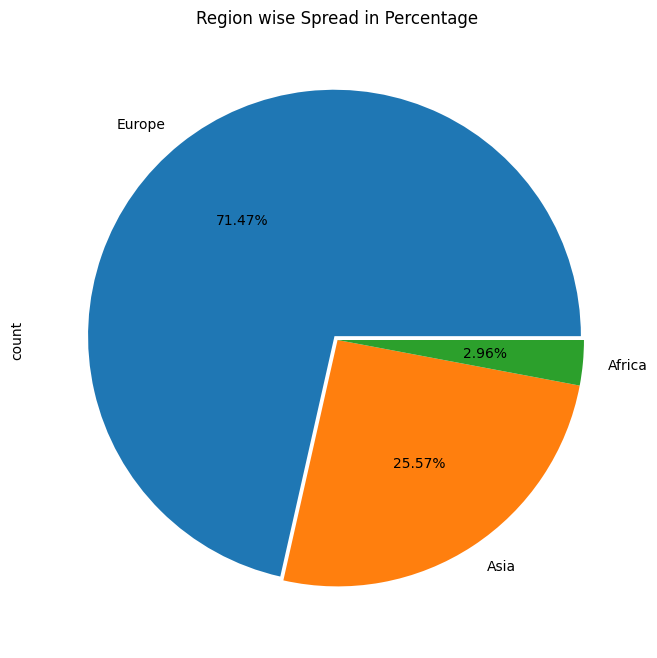

In [107]:
# Region-wise analysis: save pie chart plot
region_counts = df['region'].value_counts()
plt.figure(figsize=(12, 8))
region_counts.plot.pie(autopct="%1.2f%%", explode=(0.02, 0, 0), title="Region wise Spread in Percentage")

# Save plot
plot_path = os.path.join(plot_dir, "region_wise_spread_percentage.png")
plt.savefig(plot_path)
plt.show()

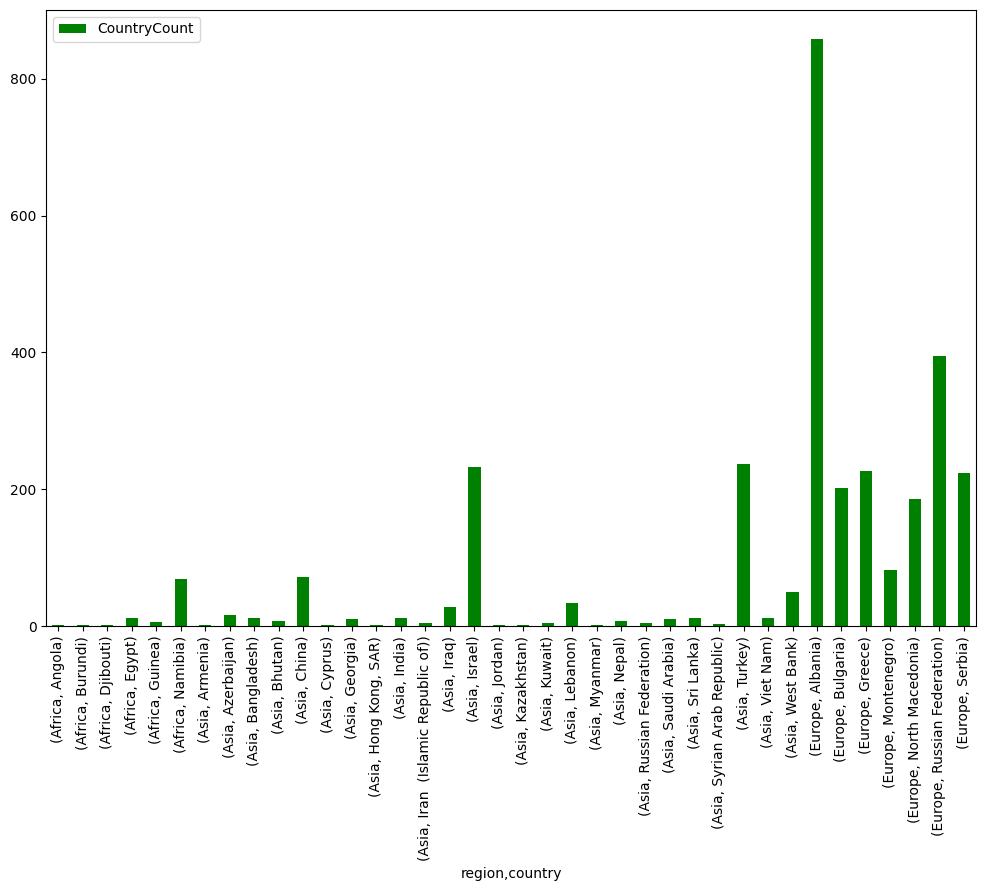

In [108]:
# Country-wise analysis: save bar chart plot
country_counts = pd.DataFrame(df.groupby(['region', 'country'])['country'].count())
country_counts.columns = ["CountryCount"]
country_counts.plot(kind="bar", color="green", figsize=(12, 8))

# Save plot
plot_path = os.path.join(plot_dir, "country_wise_counts.png")
plt.savefig(plot_path)
plt.show()

In [109]:
pd.DataFrame(df.groupby(['region','country'])['country'].count()).rename(columns={'country' : "CountryCount"})


CountryCount
region country                                  
Africa Angola                                  1
       Burundi                                 2
       Djibouti                                1
       Egypt                                  12
       Guinea                                  6
       Namibia                                68
Asia   Armenia                                 1
       Azerbaijan                             16
       Bangladesh                             11
       Bhutan                                  8
       China                                  71
       Cyprus                                  2
       Georgia                                10
       Hong Kong, SAR                          1
       India                                  12
       Iran  (Islamic Republic of)             5
       Iraq                                   28
       Israel                                233
       Jordan                                  2
       Kazakhstan                              2
       Kuwait                                  5
       Lebanon                                34
       Myanmar                                 1
       Nepal                                   8
       Russian Federation                      4
       Saudi Arabia                           10
       Sri Lanka                              12
       Syrian Arab Republic                    3
       Turkey                                237
       Viet Nam                               11
       West Bank                              50
Europe Albania                               858
       Bulgaria                              202
       Greece                                226
       Montenegro                             82
       North Macedonia                       186
       Russian Federation                    395
       Serbia                                223

In [110]:
df['reportingDate'].unique()

array(['10/9/2020', '20/12/2019', '25/10/2019', '17/09/2019',
       '25/09/2019', '19/09/2019', '15/09/2019', '9/9/2019', '4/9/2019',
       '27/08/2019', '21/08/2019', '14/08/2019', '7/8/2019', '9/3/2020',
       '22/03/2020', '5/3/2020', '18/11/2019', '6/11/2019', '4/12/2019',
       '31/10/2019', '29/10/2019', '25/08/2019', '10/10/2019',
       '9/10/2019', '12/9/2019', '26/08/2019', '30/07/2019', '29/07/2019',
       '13/07/2019', '18/06/2019', '3/6/2019', '18/03/2019', '28/12/2018',
       '13/11/2018', '26/10/2018', '19/10/2018', '17/10/2018',
       '12/10/2018', '5/10/2018', '28/09/2018', '14/09/2018', '11/9/2018',
       '10/9/2018', '22/08/2018', '28/08/2018', '15/08/2018', '9/8/2018',
       '3/8/2018', '1/8/2018', '30/07/2018', '26/07/2018', '25/07/2018',
       '23/07/2018', '20/07/2018', '17/07/2018', '29/01/2018',
       '31/01/2018', '15/12/2017', '6/11/2017', '23/10/2017', '4/9/2017',
       '31/08/2017', '25/08/2017', '24/08/2017', '18/08/2017',
       '14/08/2017', 

In [111]:
# Convert reportingDate to datetime, handling mixed formats
df['reportingDate'] = pd.to_datetime(df['reportingDate'], dayfirst=True, errors='coerce')

# Check for rows where reportingDate could not be parsed (if any)
unparsed_dates = df[df['reportingDate'].isna()]
print("Unparsed dates (if any):")
print(unparsed_dates[['reportingDate']])

# Extract year and month for further analysis if dates were successfully parsed
df['Year'] = df['reportingDate'].dt.year
df['Month'] = df['reportingDate'].dt.month
df['MonthTitle'] = df['reportingDate'].dt.month_name()


Unparsed dates (if any):
      reportingDate
2936            NaT
2937            NaT
2938            NaT
2939            NaT
2940            NaT
...             ...
24798           NaT
24799           NaT
24800           NaT
24801           NaT
24802           NaT

[21867 rows x 1 columns]


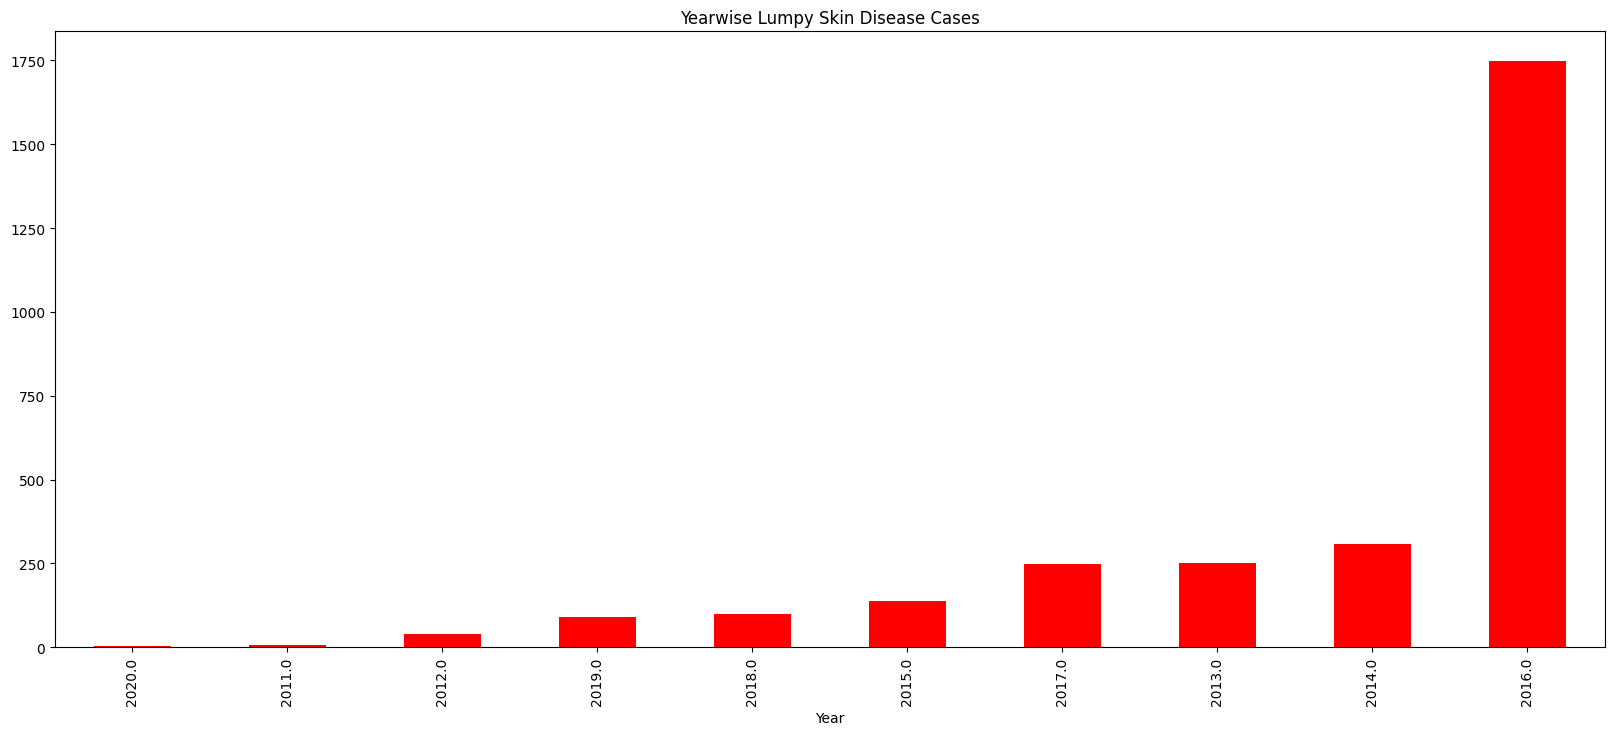

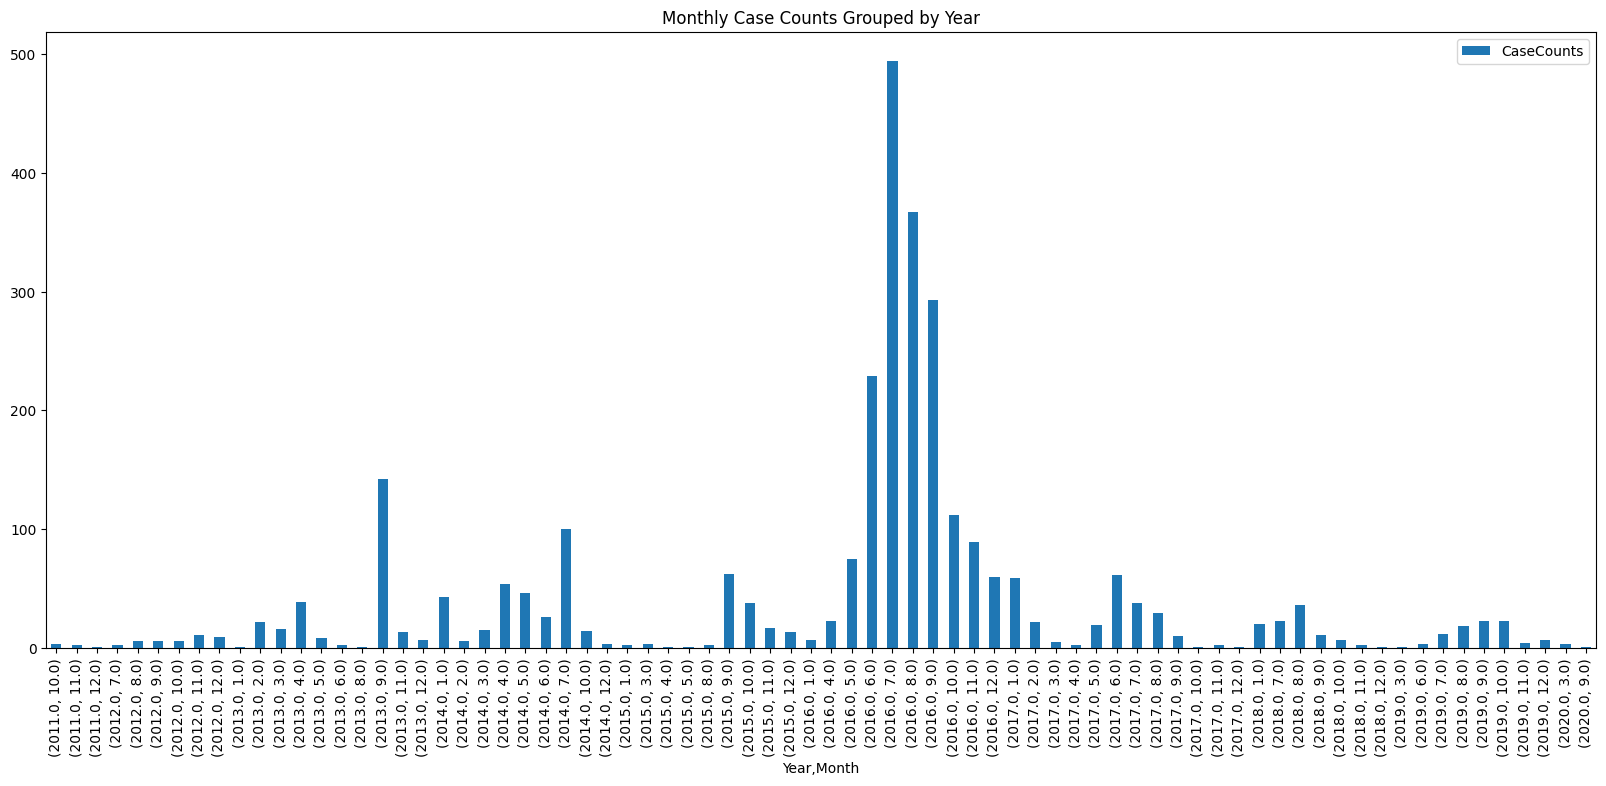

In [112]:
# Yearly case report count: save bar chart plot
year_counts = df['Year'].value_counts().sort_values(ascending=True)
year_counts.plot(kind="bar", color="red", figsize=(20, 8), title="Yearwise Lumpy Skin Disease Cases")

# Save plot
plot_path = os.path.join(plot_dir, "yearwise_case_counts.png")
plt.savefig(plot_path)
plt.show()

# Monthly case counts grouped by year (saved as a plot)
monthly_case_counts = pd.DataFrame(df.groupby(['Year', 'Month'])['Month'].count())
monthly_case_counts.columns = ['CaseCounts']
monthly_case_counts.plot(kind="bar", figsize=(20, 8), title="Monthly Case Counts Grouped by Year")

# Save plot
plot_path = os.path.join(plot_dir, "monthly_case_counts_by_year.png")
plt.savefig(plot_path)
plt.show()

### Univariate Analysis

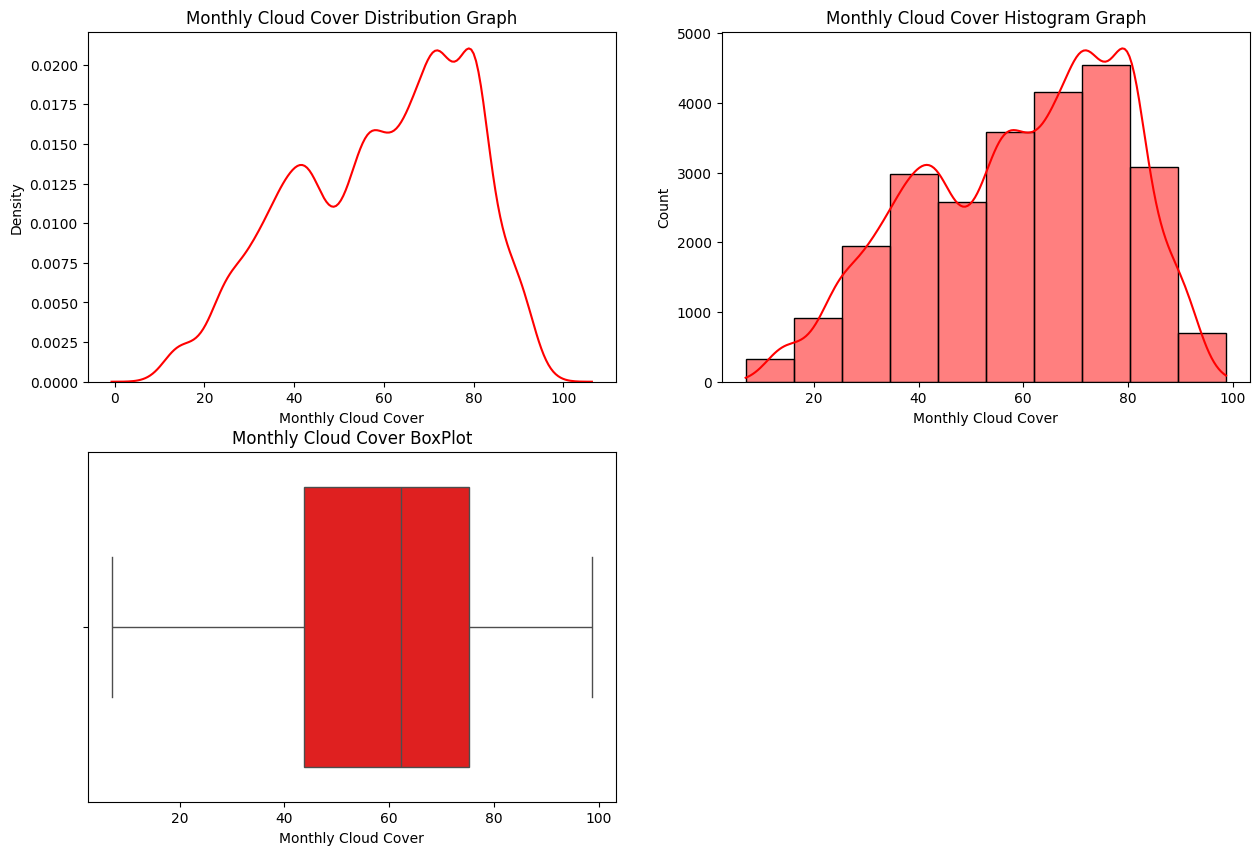

In [113]:
# Monthly Cloud Cover
plot_graph(df,'Monthly Cloud Cover')


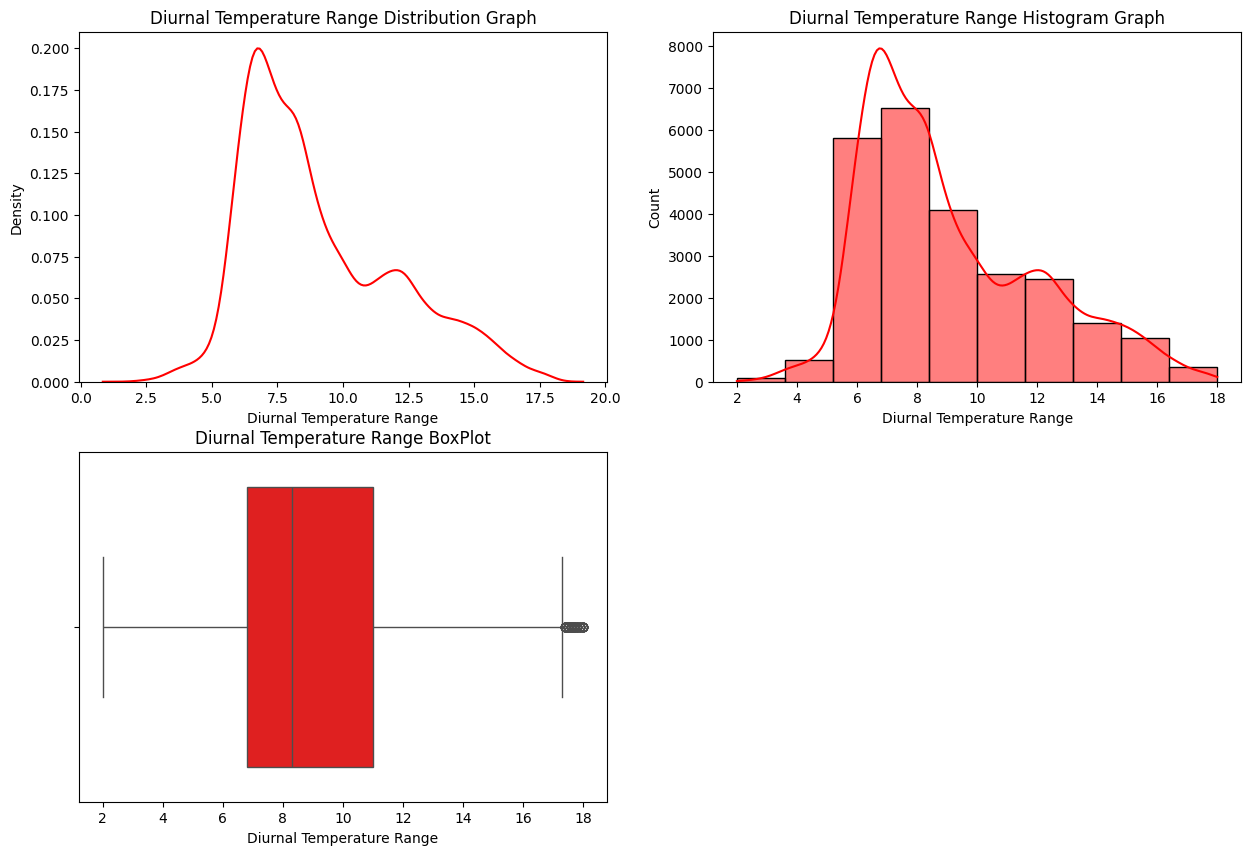

In [114]:
# Diurnal Temperature Range
plot_graph(df, 'Diurnal Temperature Range')

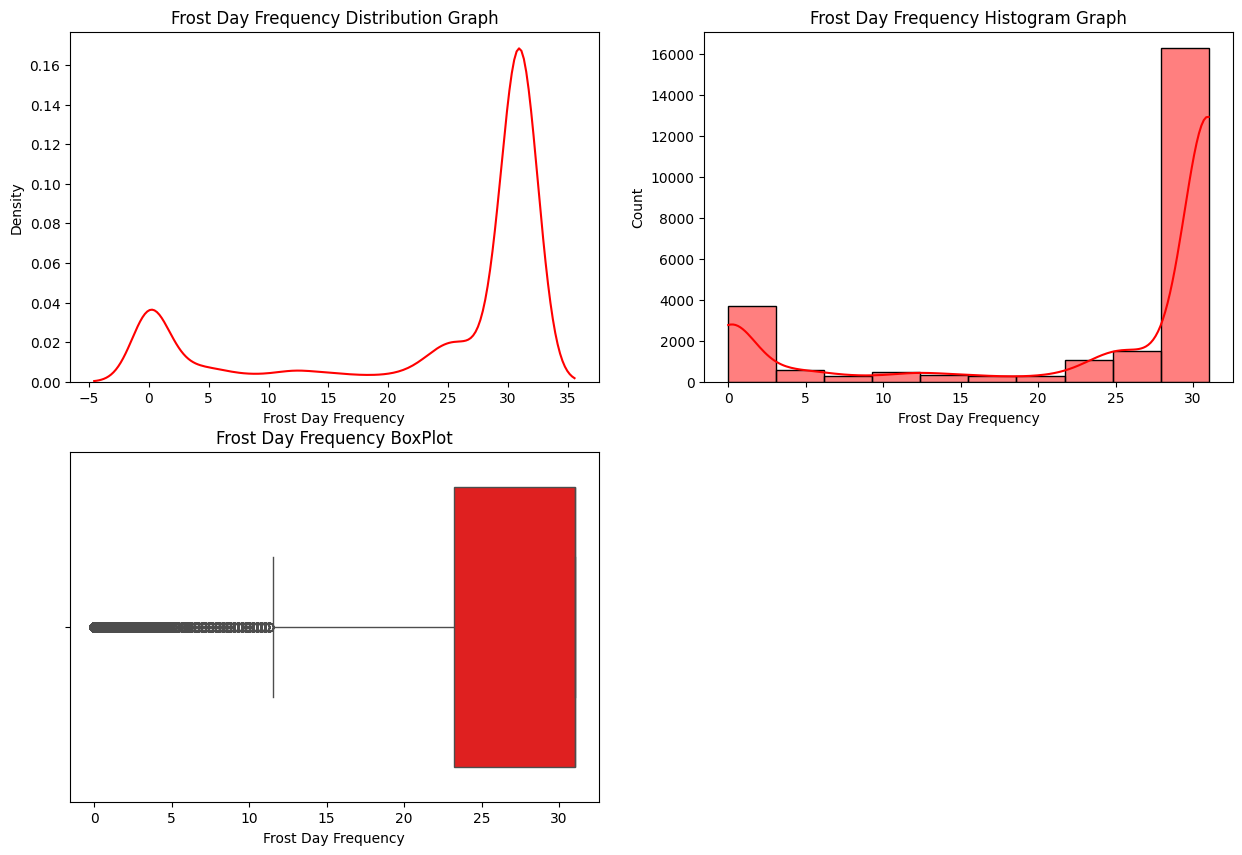

In [115]:
# Frost Day Frequency
plot_graph(df, 'Frost Day Frequency')

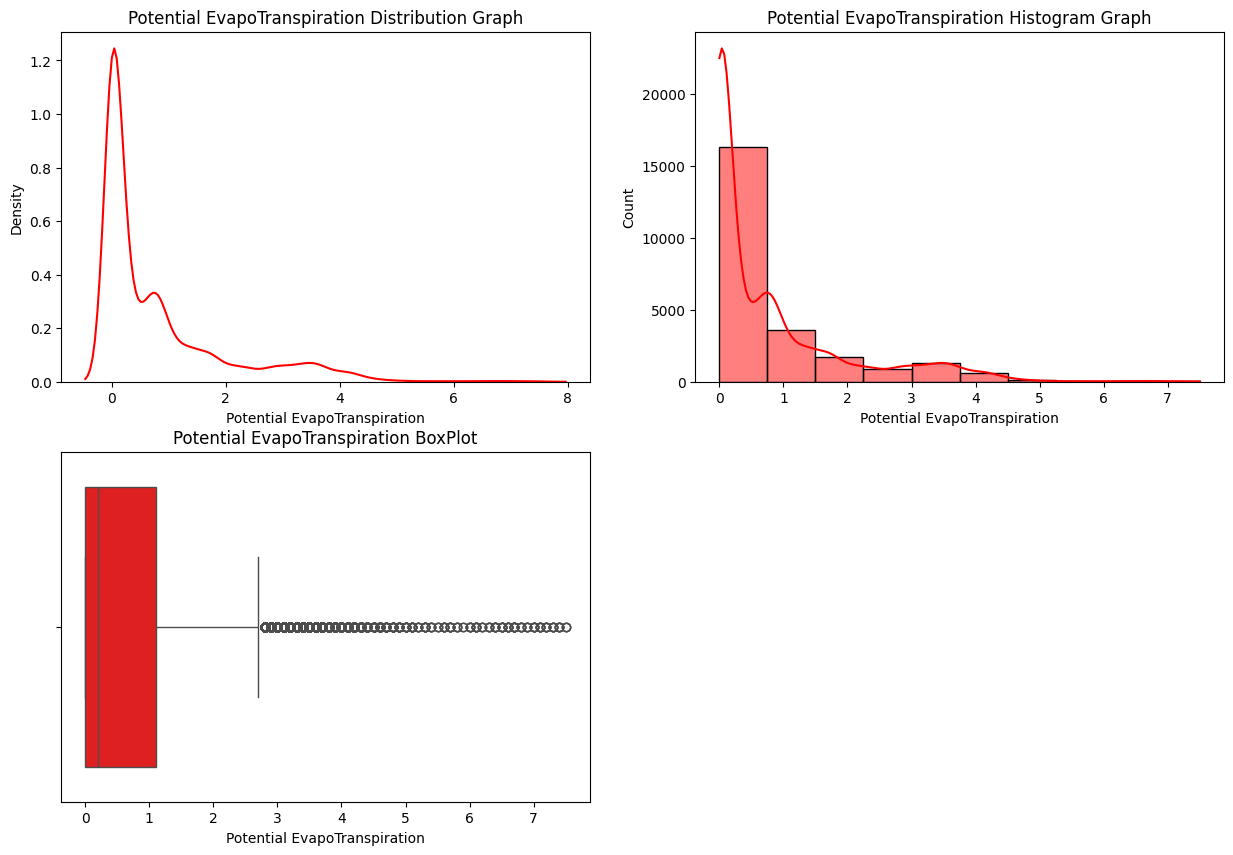

In [116]:
# Potential EvapoTranspiration
plot_graph(df, 'Potential EvapoTranspiration')

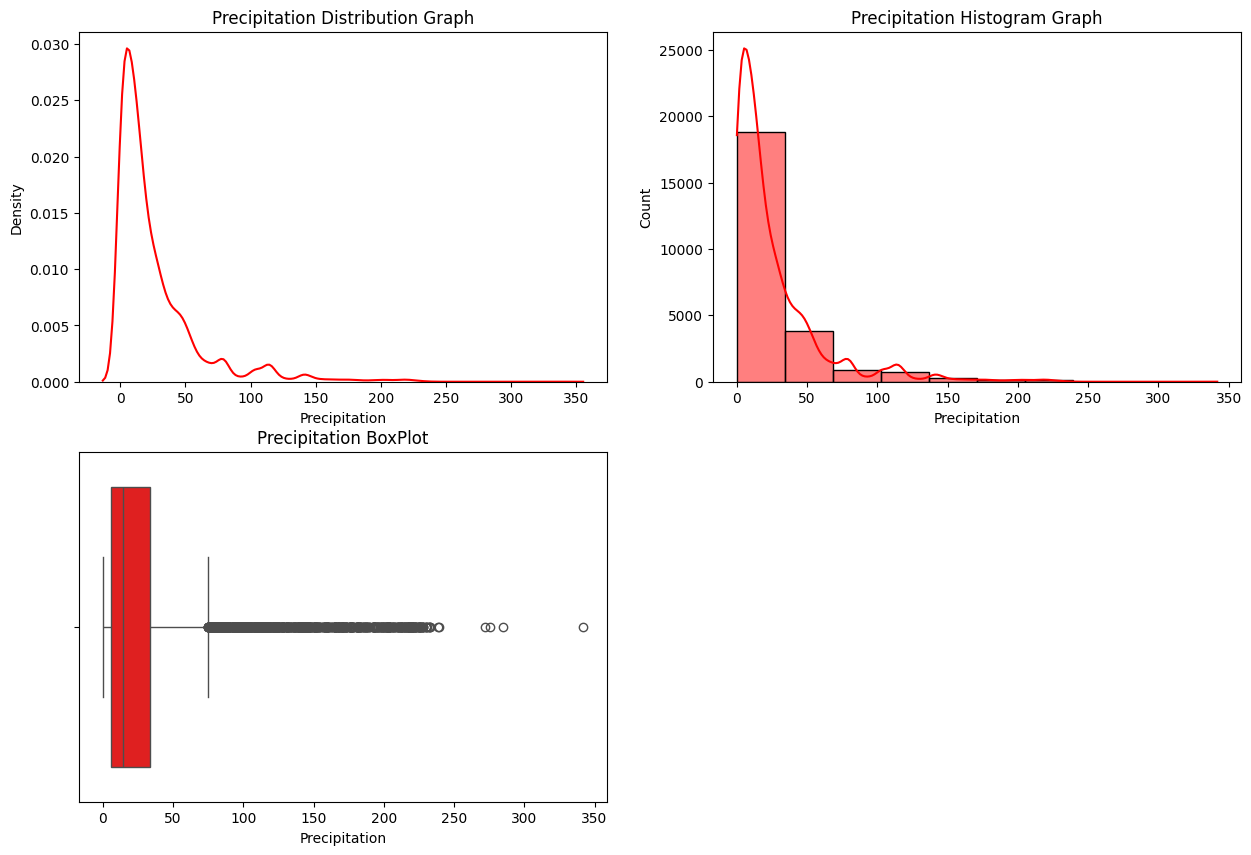

In [117]:
# Precipitation
plot_graph(df, "Precipitation")

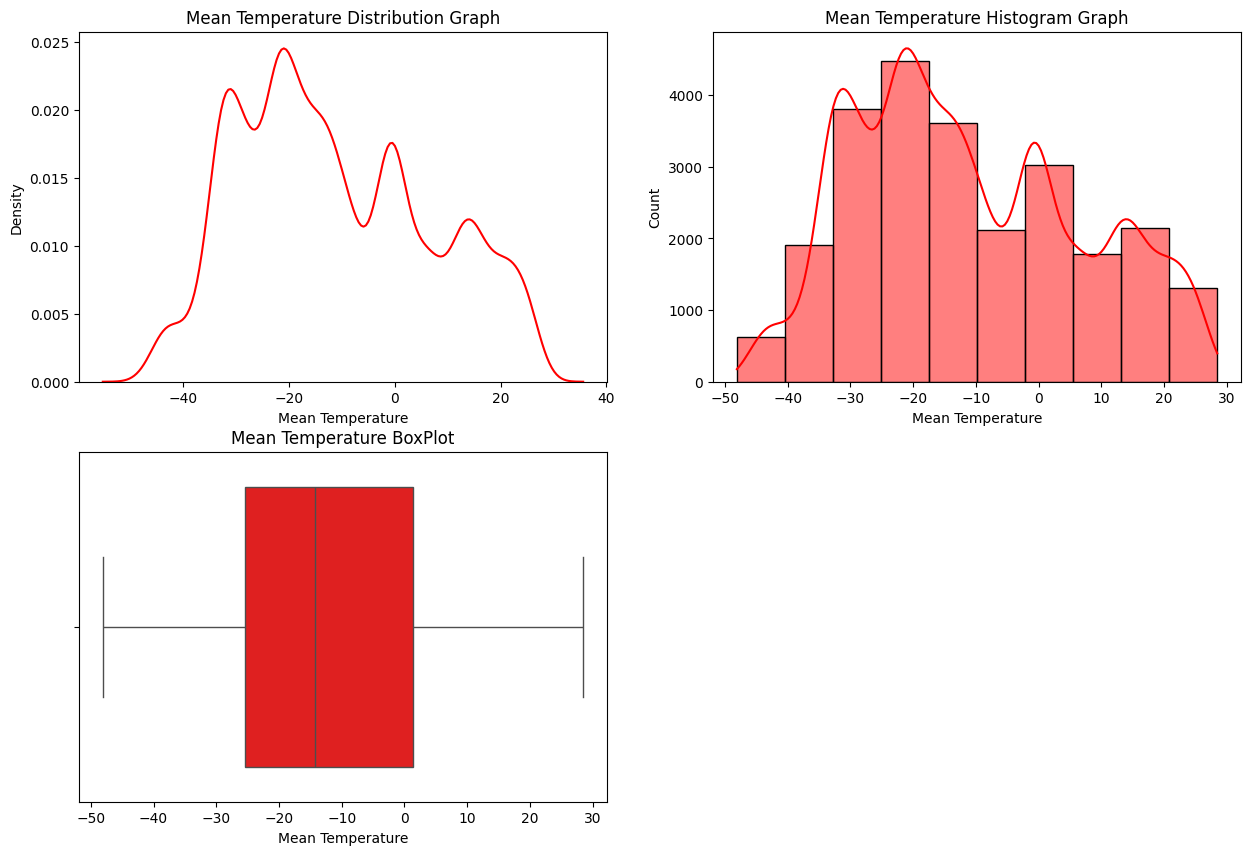

In [118]:
# Mean Temperature
plot_graph(df, "Mean Temperature")

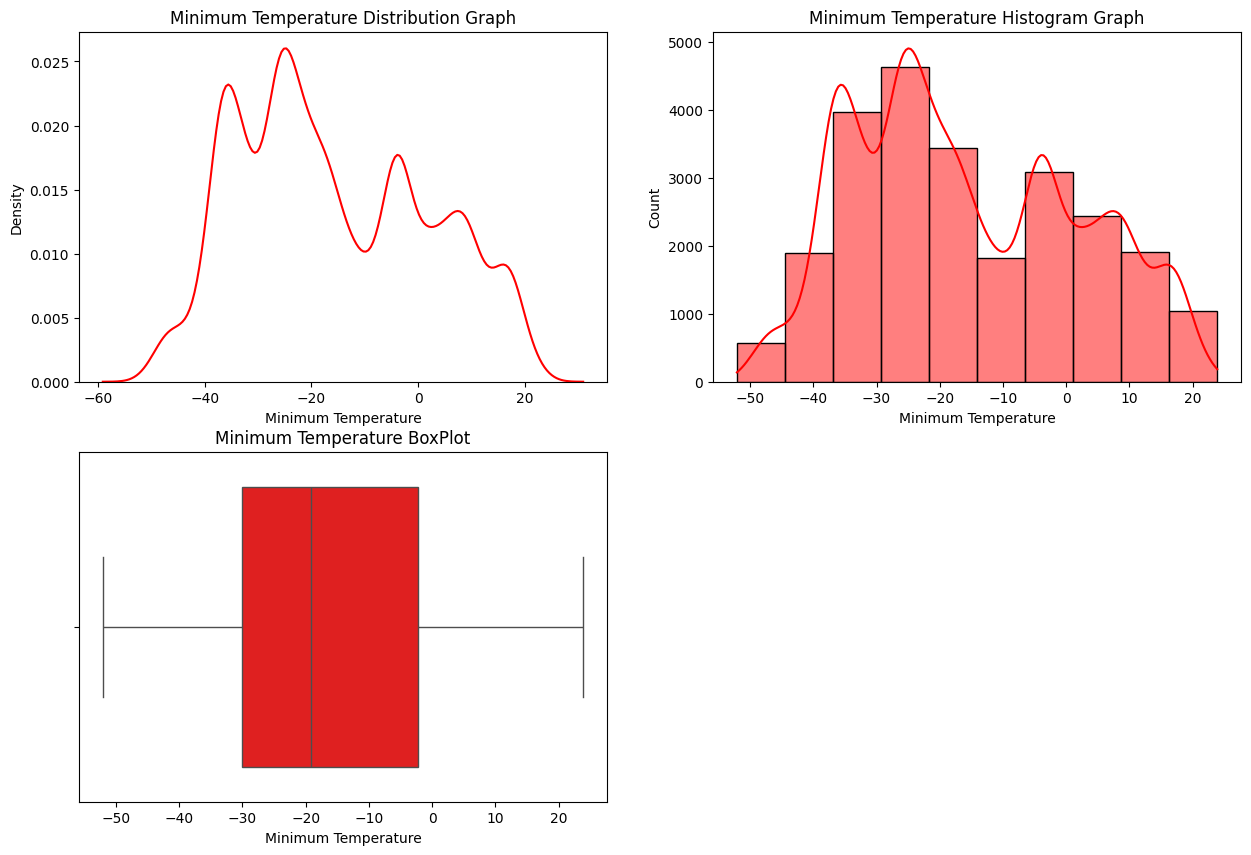

In [119]:
# Minimum Temperature
plot_graph(df, "Minimum Temperature")

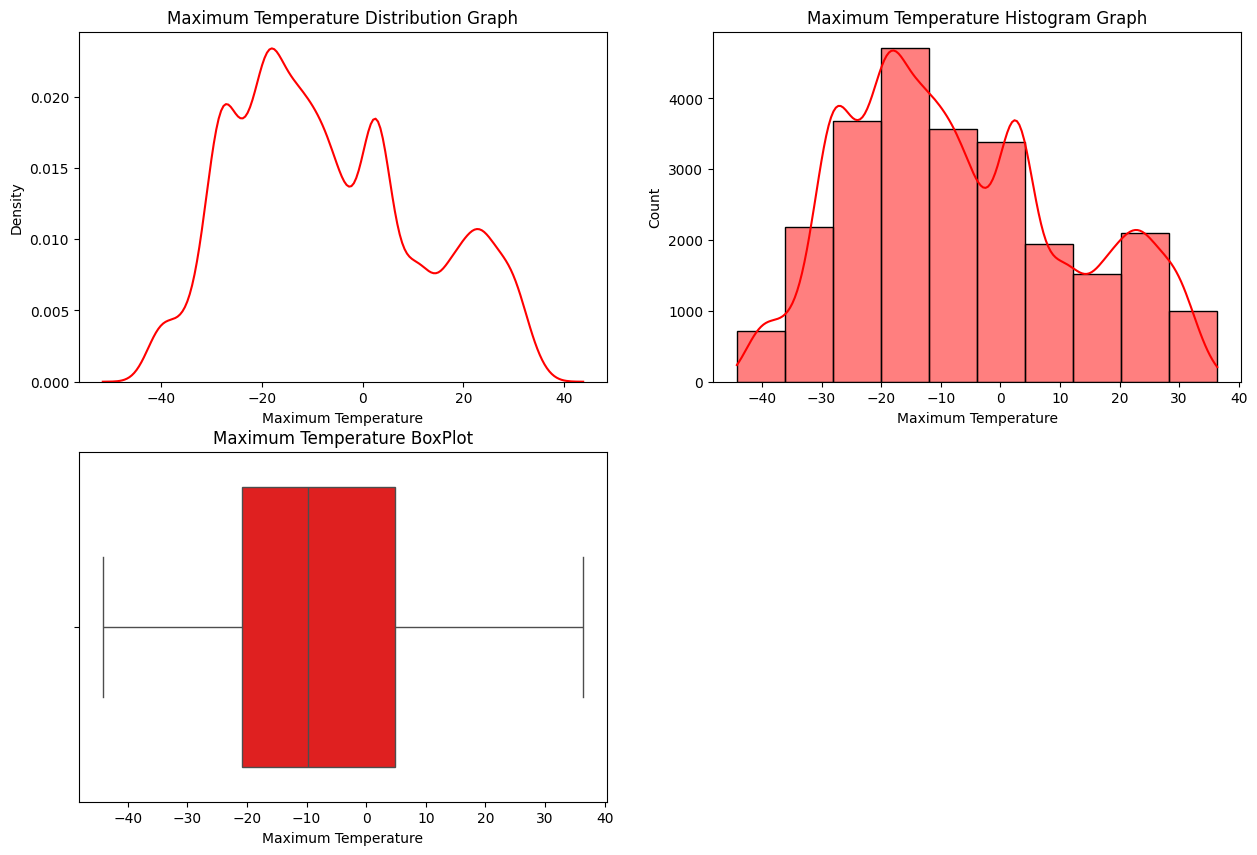

In [120]:
# Maximum Temperature
plot_graph(df, "Maximum Temperature")

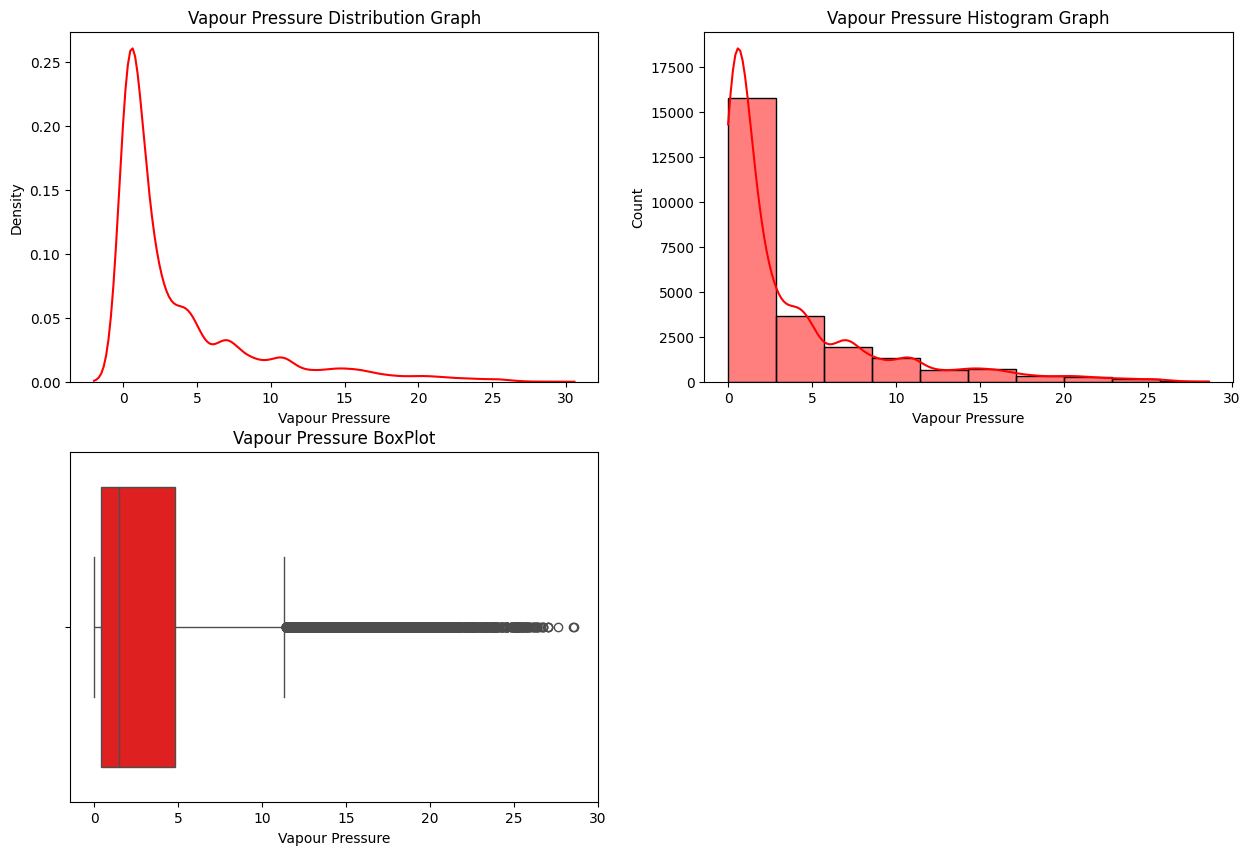

In [121]:
# Vapour Pressure
plot_graph(df, "Vapour Pressure")

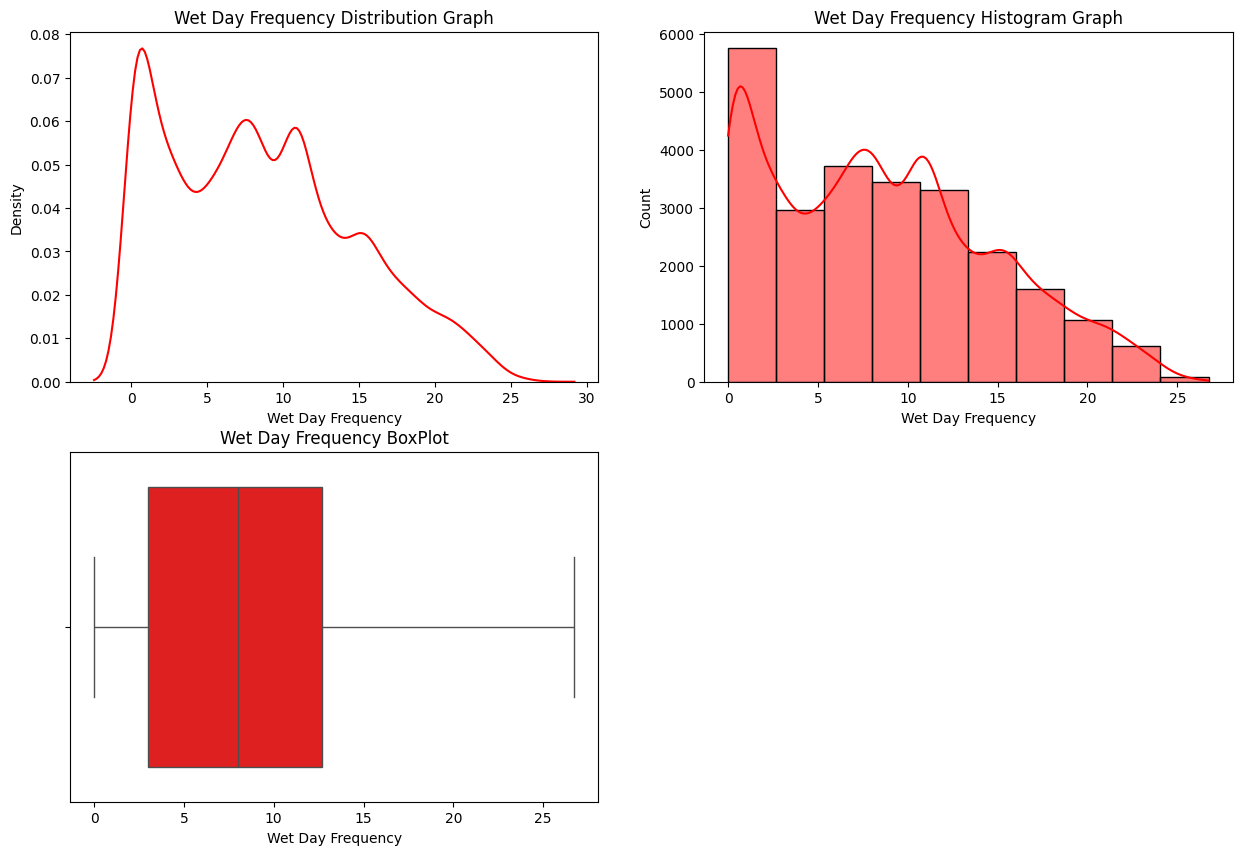

In [122]:
# Wet Day Frequency
plot_graph(df,'Wet Day Frequency')

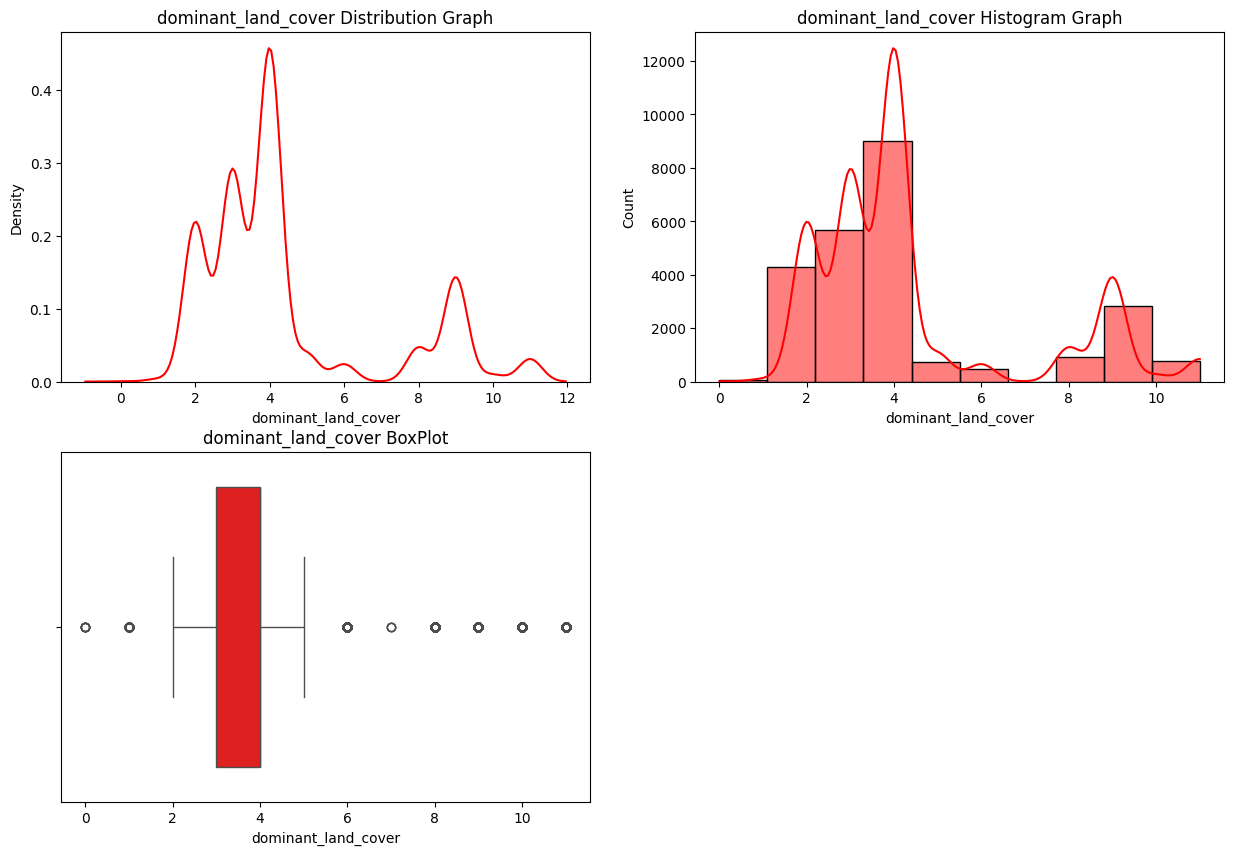

In [123]:
# Dominant Land Cover
plot_graph(df, 'dominant_land_cover')

### Bivariate Analysis

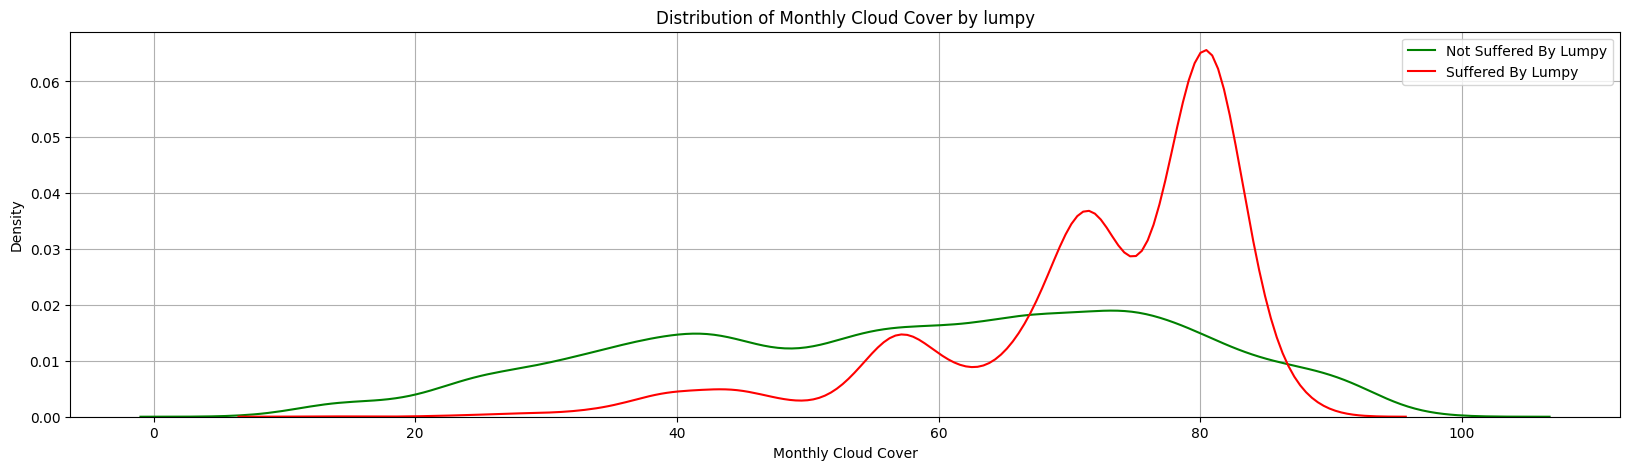

In [124]:
plot_chart(df,'lumpy','Monthly Cloud Cover')

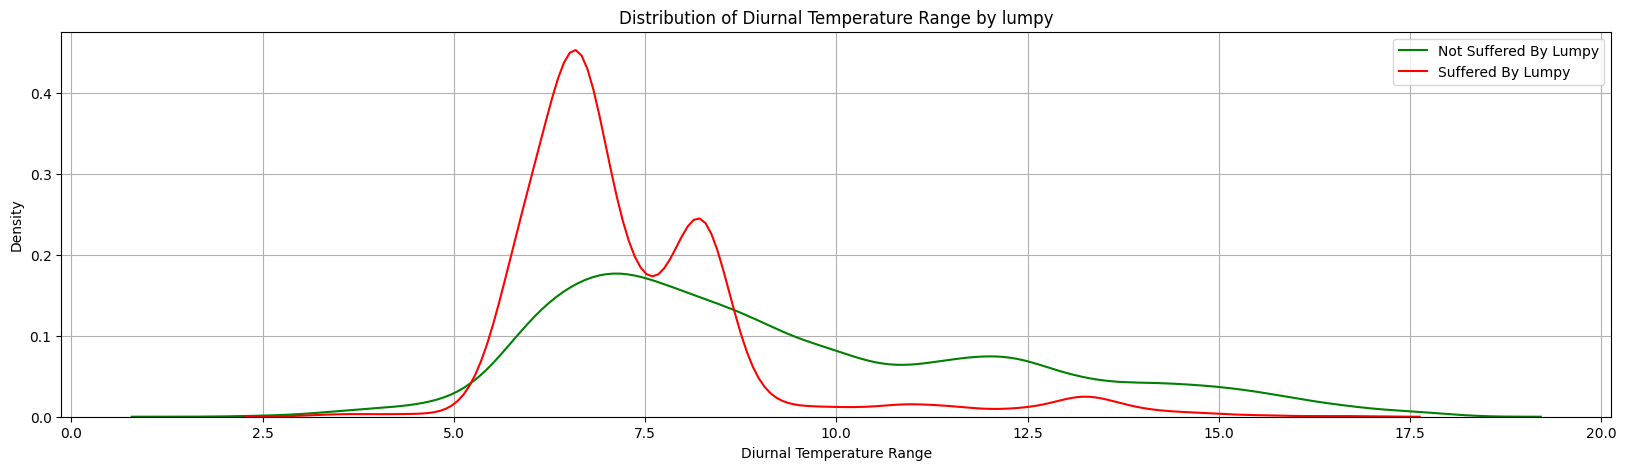

In [125]:
plot_chart(df,'lumpy','Diurnal Temperature Range')


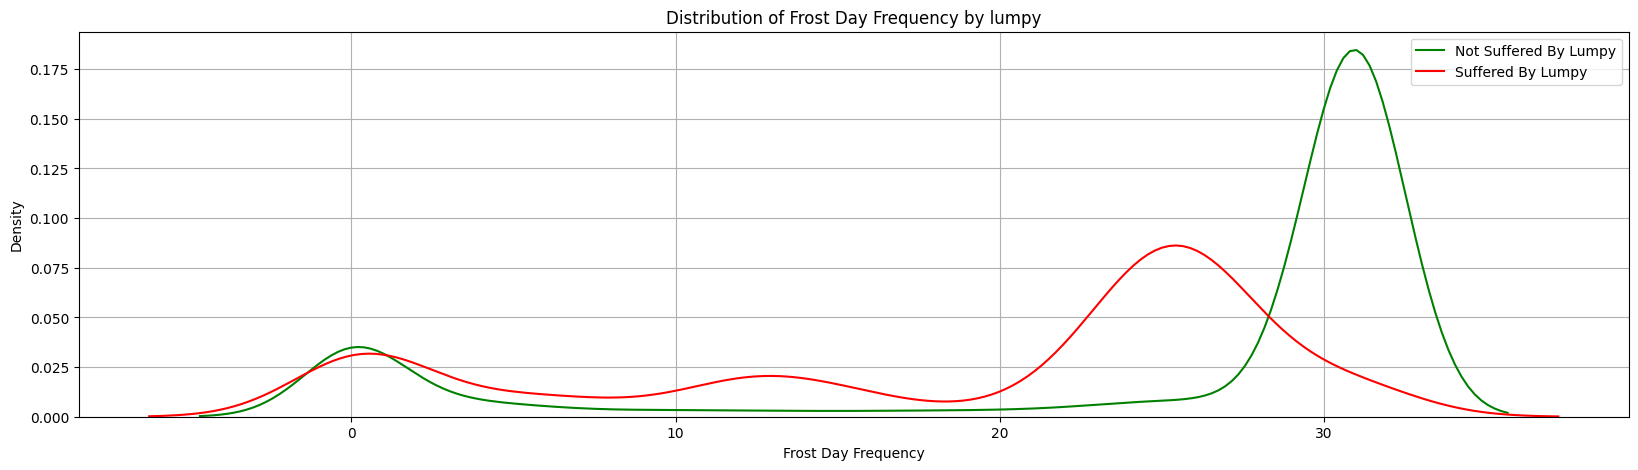

In [126]:
plot_chart(df,'lumpy','Frost Day Frequency')


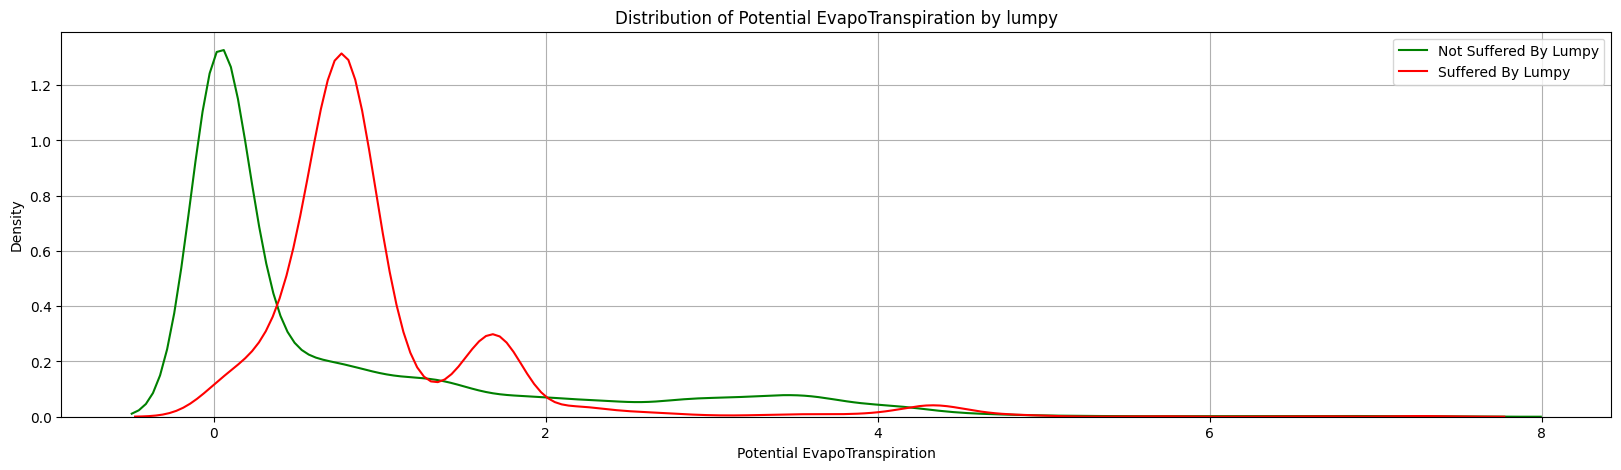

In [127]:
plot_chart(df,'lumpy','Potential EvapoTranspiration')


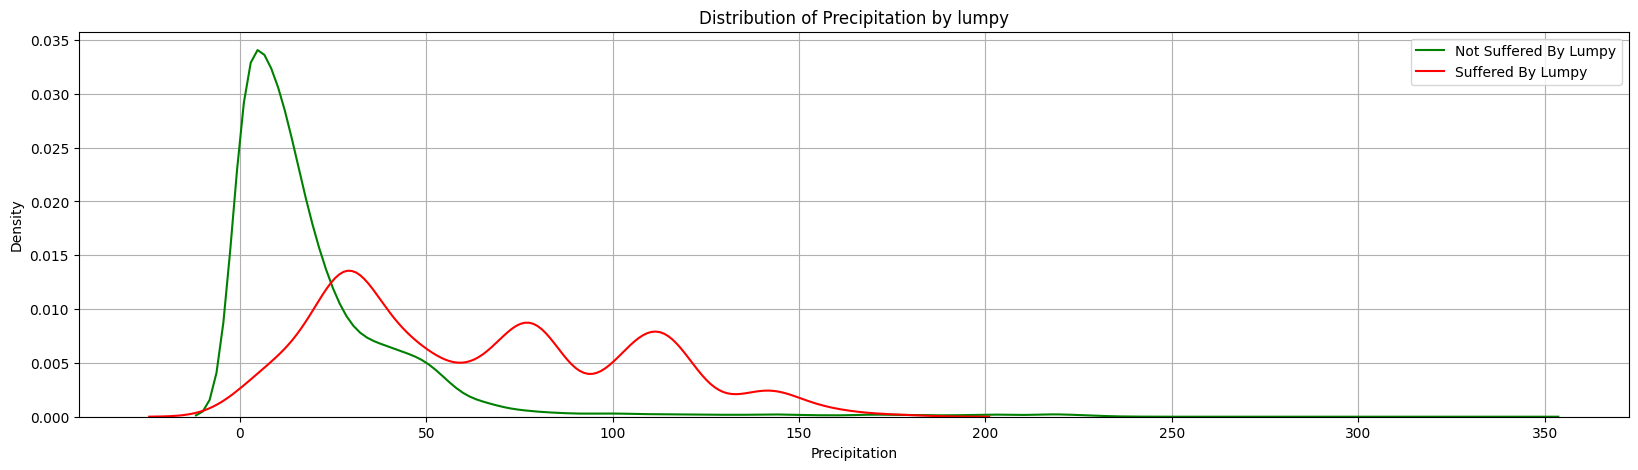

In [128]:
plot_chart(df,'lumpy','Precipitation')


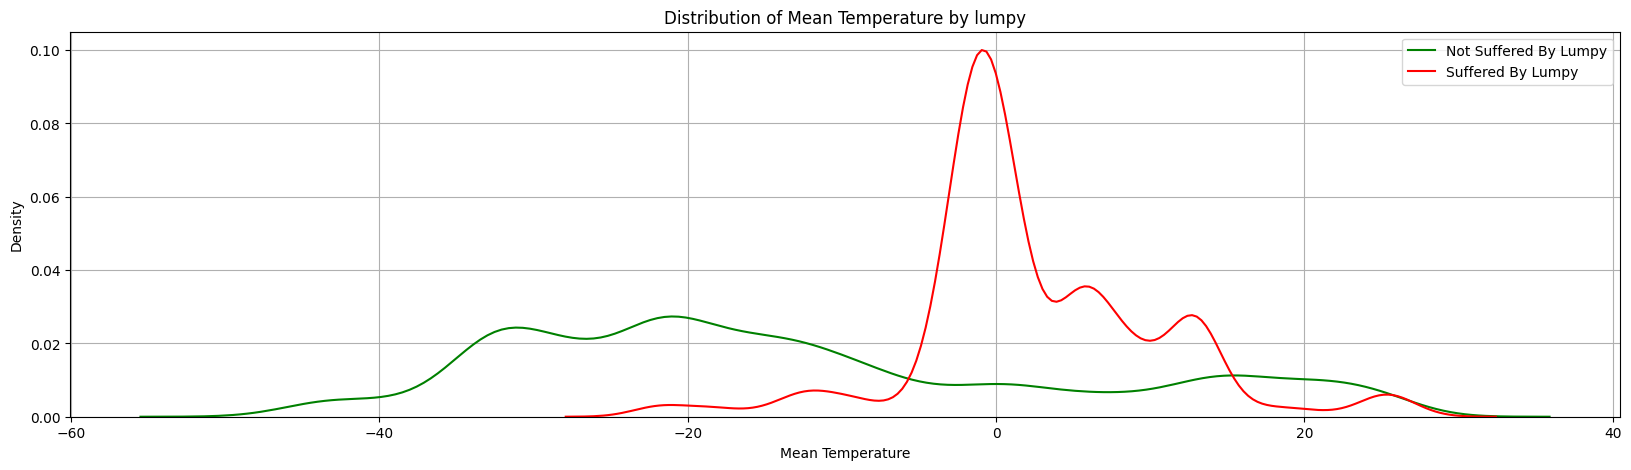

In [129]:
plot_chart(df,'lumpy','Mean Temperature')


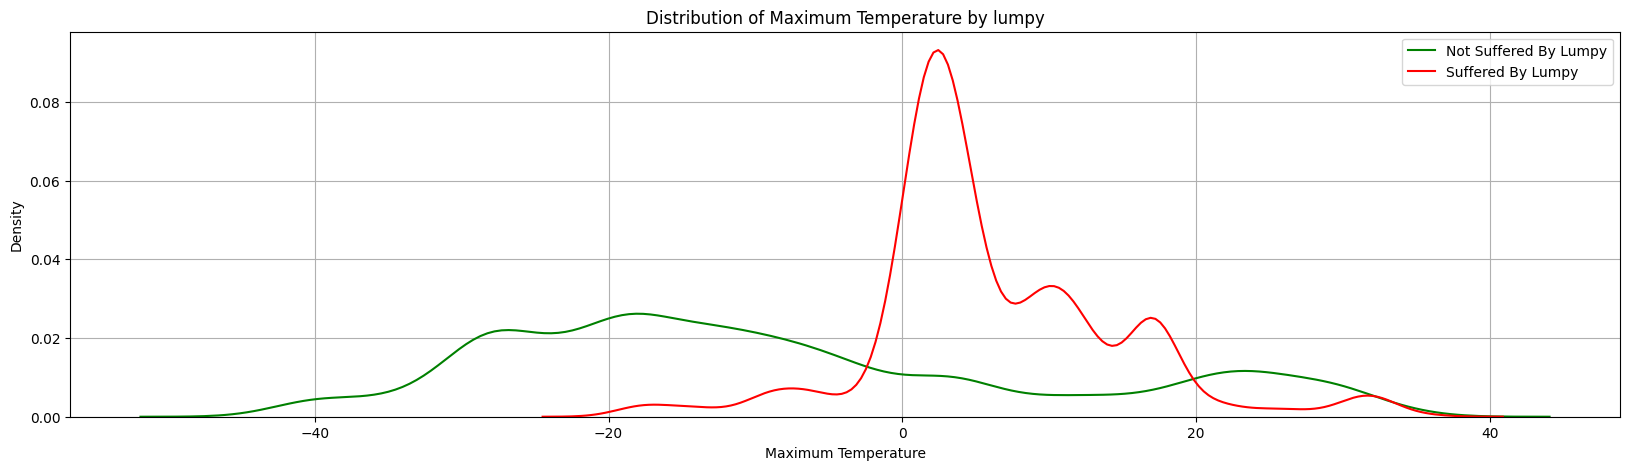

In [130]:
plot_chart(df,'lumpy','Maximum Temperature')


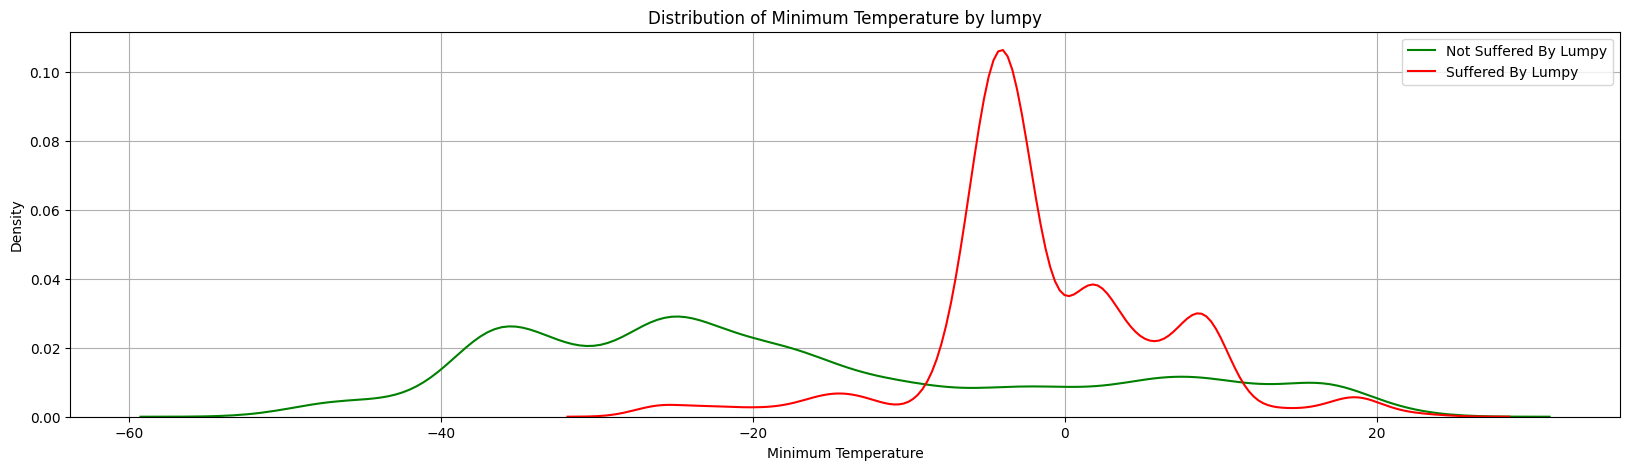

In [131]:
plot_chart(df,'lumpy','Minimum Temperature')


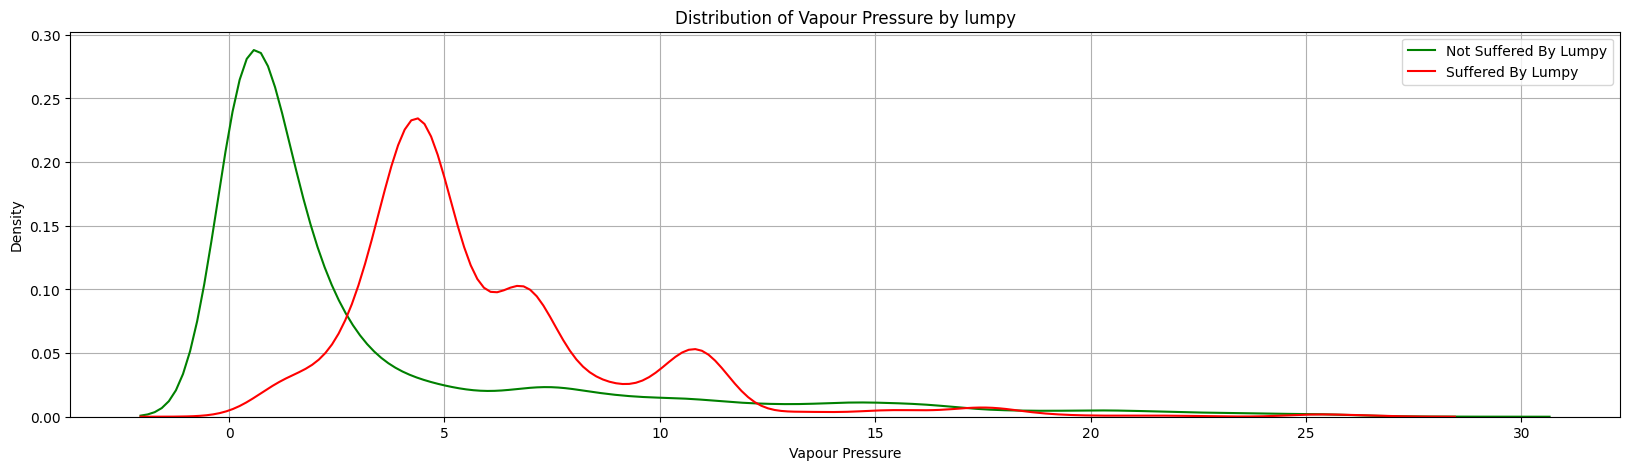

In [132]:
plot_chart(df,'lumpy','Vapour Pressure')


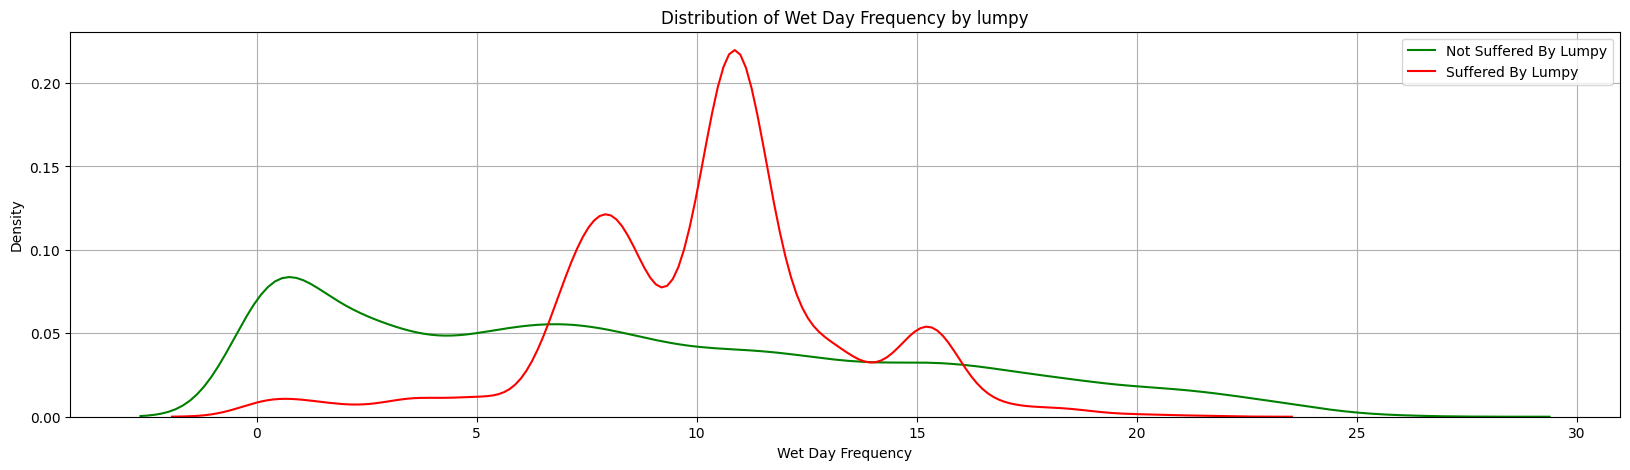

In [133]:
plot_chart(df,'lumpy','Wet Day Frequency')


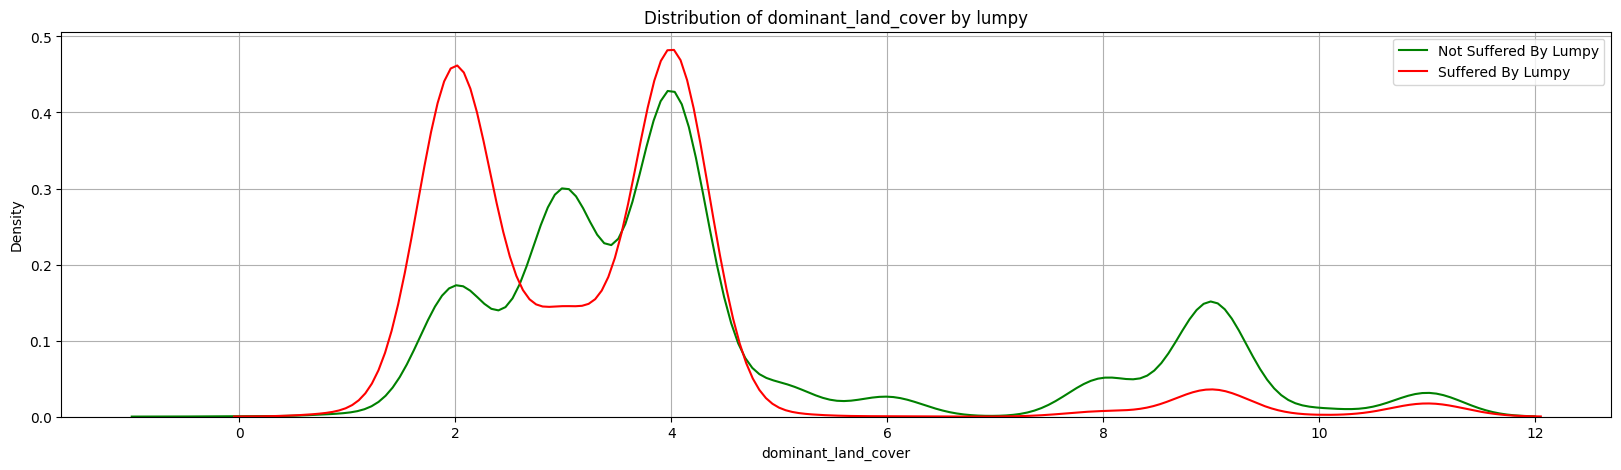

In [134]:
plot_chart(df,'lumpy','dominant_land_cover')


# Correlation Analysis

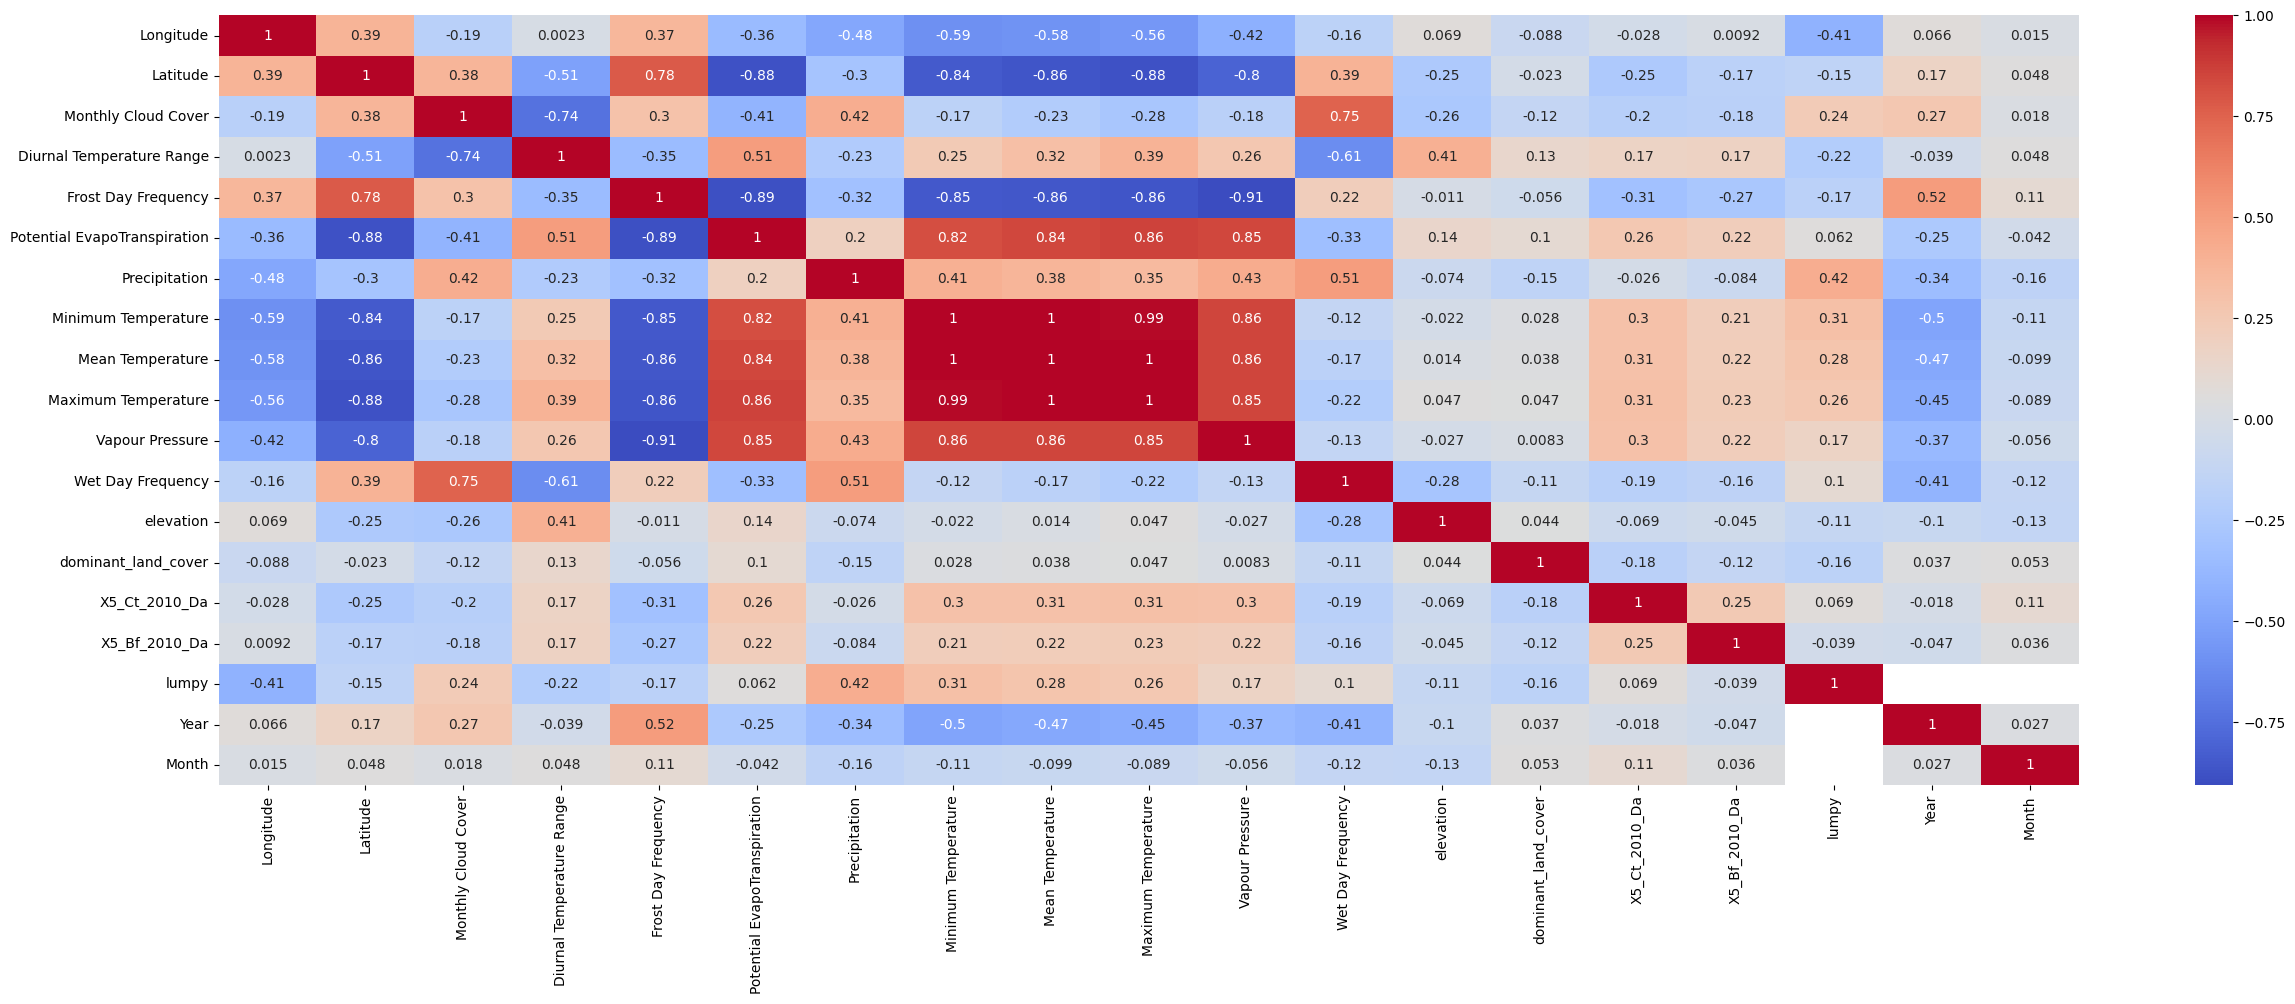

In [135]:
# Select only numeric columns for the correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(30, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [136]:
df.isna().sum()

Longitude                           0
Latitude                            0
region                          21764
country                         21764
reportingDate                   21867
Monthly Cloud Cover                 0
Diurnal Temperature Range           0
Frost Day Frequency                 0
Potential EvapoTranspiration        0
Precipitation                       0
Minimum Temperature                 0
Mean Temperature                    0
Maximum Temperature                 0
Vapour Pressure                     0
Wet Day Frequency                   0
elevation                           0
dominant_land_cover                 0
X5_Ct_2010_Da                       0
X5_Bf_2010_Da                       0
lumpy                               0
Year                            21867
Month                           21867
MonthTitle                      21867
dtype: int64

# Model Training and Prediction

In [155]:
models_dir = "models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [137]:
# Feature selection
data = df.drop(['region', 'country', 'reportingDate', 'Diurnal Temperature Range', 'Frost Day Frequency', 'elevation', 'dominant_land_cover', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da', 'Year', 'Month', 'MonthTitle'], axis=1)


In [138]:
data.head()

,Longitude,Latitude,Monthly Cloud Cover,Potential EvapoTranspiration,Precipitation,Minimum Temperature,Mean Temperature,Maximum Temperature,Vapour Pressure,Wet Day Frequency,lumpy
0,90.380931,22.437184,41.6,2.3,1.7,12.7,19.1,25.5,15.7,0.00,1
1,87.854975,22.986757,40.5,2.4,0.0,13.2,19.8,26.5,16.3,0.00,1
2,85.279935,23.610181,27.3,2.3,0.6,9.4,16.2,23.0,13.0,0.98,1
3,81.564510,43.882221,45.3,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,1
4,81.161057,43.834976,38.8,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,1


In [139]:
# Standardization
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.25750256, -1.24519576, -0.91943896, ...,  1.73572129,
         2.41743889, -1.37721084],
       [ 0.19921708, -1.2166022 , -0.9760846 , ...,  1.78965715,
         2.53859586, -1.37721084],
       [ 0.13979901, -1.18416627, -1.65583235, ...,  1.60088164,
         1.87223252, -1.21917016],
       ...,
       [-1.33766749, -3.2840533 ,  0.48125337, ...,  1.97303907,
         4.07325082,  1.18208057],
       [-1.32613018, -3.2840533 ,  0.48125337, ...,  1.97843265,
         4.13382931,  1.25142495],
       [-1.31459287, -3.2840533 ,  0.41430852, ...,  1.98382624,
         4.19440779,  1.31109337]])

In [156]:
joblib.dump(scaler, f"{models_dir}/scaler_object.joblib")

['models/scaler_object.joblib']

In [140]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_Train = ", X_train.shape)
print("X_Test = ", X_test.shape)
print("y_train = ", y_train.shape)
print("y_test = ", y_test.shape)

X_Train =  (19842, 10)
X_Test =  (4961, 10)
y_train =  (19842,)
y_test =  (4961,)


### Traditional Models

In [141]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib

In [142]:
# Define parameter grids for each algorithm
param_grids = {
    'LogisticRegression': [
        {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 500]},
        {'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 500]}
    ],
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'class_weight': [None, 'balanced']
    },
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.5, 0.7, 1.0]
    }
}

# Define models to tune
models = {
    'LogisticRegression': LogisticRegression(random_state=1234),
    'RandomForest': RandomForestClassifier(random_state=1234),
    'SVC': SVC(probability=True, random_state=1234),
    'KNeighbors': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1234)
}

# Initialize dictionaries to store best models and results
best_models = {}
best_scores = {}

In [143]:
# Use RandomizedSearchCV for faster tuning
def train_traditional_models():
    for model_name, model in models.items():
        print(f"Tuning {model_name} with RandomizedSearchCV...")
        random_search = RandomizedSearchCV(
            model,
            param_grids[model_name],
            n_iter=20,  # Adjust this for more/less sampling
            cv=5,
            scoring='accuracy',
            random_state=1234,
            n_jobs=-1  # Utilize all available CPU cores
        )
        
        random_search.fit(X_train, y_train)
        
        # Save the best model and its parameters
        best_models[model_name] = random_search.best_estimator_
        best_scores[model_name] = random_search.best_score_
        
        # Display best parameters and score
        print(f"Best Parameters for {model_name}: {random_search.best_params_}")
        print(f"Best Cross-Validation Score for {model_name}: {random_search.best_score_}")

train_traditional_models()    # Uncomment this if the model is not yet trained and saved in local

Tuning LogisticRegression with RandomizedSearchCV...
Best Parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'C': 100}
Best Cross-Validation Score for LogisticRegression: 0.9470818449841107
Tuning RandomForest with RandomizedSearchCV...
Best Parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None, 'class_weight': None}
Best Cross-Validation Score for RandomForest: 0.9763630840627769
Tuning SVC with RandomizedSearchCV...
Best Parameters for SVC: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
Best Cross-Validation Score for SVC: 0.9649228217272572
Tuning KNeighbors with RandomizedSearchCV...
Best Parameters for KNeighbors: {'weights': 'uniform', 'p': 1, 'n_neighbors': 7}
Best Cross-Validation Score for KNeighbors: 0.9699625474443062
Tuning XGBClassifier with RandomizedSearchCV...
Best Parameters for XGBClassifier: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2}
Best Cross-Validatio

In [144]:
# Print summary of best models
print("\nSummary of Best Models and Scores:")
for model_name in best_models:
    print(f"{model_name} - Best Score: {best_scores[model_name]}")


Summary of Best Models and Scores:
LogisticRegression - Best Score: 0.9470818449841107
RandomForest - Best Score: 0.9763630840627769
SVC - Best Score: 0.9649228217272572
KNeighbors - Best Score: 0.9699625474443062
XGBClassifier - Best Score: 0.9752543527865148


In [145]:
# Evaluate each best model on test data and save models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Print evaluation metrics
    print(f"\nPerformance of {model_name} on Test Data:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Save the best model
    joblib.dump(model, f'{models_dir}/{model_name.lower()}_best_model.pkl')



Performance of LogisticRegression on Test Data:
[[4243  111]
 [ 153  454]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4354
           1       0.80      0.75      0.77       607

    accuracy                           0.95      4961
   macro avg       0.88      0.86      0.87      4961
weighted avg       0.95      0.95      0.95      4961


Performance of RandomForest on Test Data:
[[4285   69]
 [  55  552]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4354
           1       0.89      0.91      0.90       607

    accuracy                           0.98      4961
   macro avg       0.94      0.95      0.94      4961
weighted avg       0.98      0.98      0.98      4961


Performance of SVC on Test Data:
[[4269   85]
 [ 112  495]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4354
           1       0.85      0

### Deep Learning Model (ANN)

In [146]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import Adam
from keras.losses import MeanSquaredLogarithmicError
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [147]:
# Define the model builder function
def build_model(hp):
    model = Sequential()
    
    # Tune the number of units in the first Dense layer
    hp_units1 = hp.Int('units1', min_value=128, max_value=512, step=64)
    model.add(Dense(units=hp_units1, activation='relu'))
    model.add(Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)))

    # Tune the number of units in the second Dense layer
    hp_units2 = hp.Int('units2', min_value=64, max_value=256, step=64)
    model.add(Dense(units=hp_units2, activation='relu'))
    model.add(Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)))

    # Tune the number of units in the third Dense layer
    hp_units3 = hp.Int('units3', min_value=32, max_value=128, step=32)
    model.add(Dense(units=hp_units3, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4])),
        loss=MeanSquaredLogarithmicError(),
        metrics=['accuracy']
    )
    
    return model

In [148]:
# Initialize Keras Tuner with RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # You can increase the number of trials for better tuning
    executions_per_trial=3,
    directory='ann_tuning',
    project_name='lumpy_skin_disease'
)

Reloading Tuner from ann_tuning\lumpy_skin_disease\tuner0.json


In [149]:
# Perform the search
tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

In [150]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print("Best hyperparameters:")
print(f"Units in first layer: {best_hps.get('units1')}")
print(f"Dropout in first layer: {best_hps.get('dropout1')}")
print(f"Units in second layer: {best_hps.get('units2')}")
print(f"Dropout in second layer: {best_hps.get('dropout2')}")
print(f"Units in third layer: {best_hps.get('units3')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")


Best hyperparameters:
Units in first layer: 384
Dropout in first layer: 0.1
Units in second layer: 192
Dropout in second layer: 0.5
Units in third layer: 32
Learning rate: 0.001


In [151]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model on the dataset
history = best_model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_split=0.2
)

Epoch 1/10
497/497 [==============================] - 7s 10ms/step - loss: 0.0213 - accuracy: 0.9451 - val_loss: 0.0178 - val_accuracy: 0.9574
Epoch 2/10
497/497 [==============================] - 5s 9ms/step - loss: 0.0171 - accuracy: 0.9585 - val_loss: 0.0169 - val_accuracy: 0.9577
Epoch 3/10
497/497 [==============================] - 5s 10ms/step - loss: 0.0166 - accuracy: 0.9598 - val_loss: 0.0162 - val_accuracy: 0.9617
Epoch 4/10
497/497 [==============================] - 5s 10ms/step - loss: 0.0162 - accuracy: 0.9601 - val_loss: 0.0155 - val_accuracy: 0.9630
Epoch 5/10
497/497 [==============================] - 5s 10ms/step - loss: 0.0160 - accuracy: 0.9614 - val_loss: 0.0157 - val_accuracy: 0.9615
Epoch 6/10
497/497 [==============================] - 5s 10ms/step - loss: 0.0155 - accuracy: 0.9611 - val_loss: 0.0157 - val_accuracy: 0.9615
Epoch 7/10
497/497 [==============================] - 5s 10ms/step - loss: 0.0152 - accuracy: 0.9618 - val_loss: 0.0147 - val_accuracy: 0.9637


In [154]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
threshold = 0.5
predicted_probabilities = best_model.predict(X_test)
dl_model_pred = (predicted_probabilities > threshold).astype(int)

print('Results for ANN Model')
print(accuracy_score(y_test, dl_model_pred))
print(classification_report(y_test, dl_model_pred))

dl_cm= confusion_matrix(y_test,dl_model_pred)
TP=dl_cm[0][0]
TN=dl_cm[1][1]
FN=dl_cm[1][0]
FP=dl_cm[0][1]
print('Testing Accuracy for DL model:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for DL model:',(TP/(TP+FN)))
print('Testing Specificity for DL model:',(TN/(TN+FP)))
print('Testing Precision for DL model:',(TP/(TP+FP)))

  1/156 [..............................] - ETA: 8s

156/156 [==============================] - 1s 6ms/step
Results for ANN Model
0.9598871195323524
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4354
           1       0.85      0.81      0.83       607

    accuracy                           0.96      4961
   macro avg       0.91      0.90      0.90      4961
weighted avg       0.96      0.96      0.96      4961

Testing Accuracy for DL model: 0.9598871195323524
Testing Sensitivity for DL model: 0.973990417522245
Testing Specificity for DL model: 0.8529411764705882
Testing Precision for DL model: 0.9804777216352779


In [153]:
best_model.save(f"{models_dir}/dl_model.h5")

# Model Comparision

In [158]:
import os
import joblib
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import plotly.graph_objects as go

# Ensure 'plots' directory exists
plots_dir = "plots"
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Define model directory
models_dir = "models"

# Load all .pkl files for ML models and the .h5 file for DL model
ml_model_filenames = [f for f in os.listdir(models_dir) if f.endswith('.pkl')]
dl_model_filename = [f for f in os.listdir(models_dir) if f.endswith('.h5')][0]  # Assumes only one .h5 file

# Load ML and DL models
ml_models = [joblib.load(os.path.join(models_dir, filename)) for filename in ml_model_filenames]
dl_model = load_model(os.path.join(models_dir, dl_model_filename))

# Function to evaluate a model and return metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate ML models
ml_model_metrics = [evaluate_model(model, X_test, y_test) for model in ml_models]

# Evaluate deep learning model
y_pred_dl = np.round(dl_model.predict(X_test)).astype(int)
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl)
recall_dl = recall_score(y_test, y_pred_dl)
f1_dl = f1_score(y_test, y_pred_dl)

# Combine results for plotting
model_names = [filename.split('_')[0] for filename in ml_model_filenames] + ["Deep Learning"]
accuracies = [metric[0] for metric in ml_model_metrics] + [accuracy_dl]
precisions = [metric[1] for metric in ml_model_metrics] + [precision_dl]
recalls = [metric[2] for metric in ml_model_metrics] + [recall_dl]
f1_scores = [metric[3] for metric in ml_model_metrics] + [f1_dl]

# Create a Plotly figure
fig = go.Figure()

# Accuracy Plot
fig.add_trace(go.Bar(
    x=model_names,
    y=accuracies,
    name='Accuracy',
    text=[f'{acc:.2f}' for acc in accuracies],
    textposition='outside'
))

# Precision Plot
fig.add_trace(go.Bar(
    x=model_names,
    y=precisions,
    name='Precision',
    text=[f'{prec:.2f}' for prec in precisions],
    textposition='outside'
))

# Recall Plot
fig.add_trace(go.Bar(
    x=model_names,
    y=recalls,
    name='Recall',
    text=[f'{rec:.2f}' for rec in recalls],
    textposition='outside'
))

# F1 Score Plot
fig.add_trace(go.Bar(
    x=model_names,
    y=f1_scores,
    name='F1 Score',
    text=[f'{f1:.2f}' for f1 in f1_scores],
    textposition='outside'
))

# Update layout for a vibrant theme and adjust plot size
fig.update_layout(
    title="Model Performance Metrics",
    barmode='group',
    xaxis_title="Models",
    yaxis_title="Score",
    legend_title="Metrics",
    template="plotly_dark",
    width=1200,    # Set the desired width
    height=700     # Set the desired height
)

# Save the figure to the plots directory
fig.write_image(os.path.join(plots_dir, "model_performance_metrics.png"))

# Show plot
fig.show()


156/156 [==============================] - 1s 4ms/step
